 # TP1. Fully Connected Networks
 
 #### Université Jean-Monnet, 2019-2020

## Part 1. Classification on Tabular data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Here is an example with dummy data, 3 classes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [7]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=20, n_features=2, cluster_std=1.5,
                  centers=centers)
y_original = y


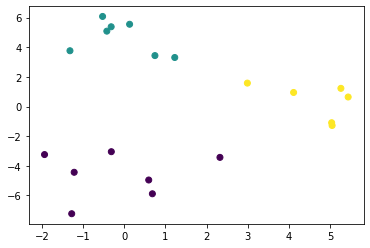

In [8]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [35]:
X[:10]

array([[-1.17366457, -6.56292056],
       [ 1.60241369,  3.92981741],
       [-0.67065009, -7.002039  ],
       [ 6.43963144,  0.51818605],
       [ 0.18694105, -3.62158941],
       [ 6.69073513, -0.57910208],
       [-0.67442491, -3.85089242],
       [ 6.61393916, -1.46732328],
       [ 0.34127282, -6.41963501],
       [ 3.8214504 , -1.06242573]])

In [6]:
y[:10]

array([2, 1, 1, 1, 2, 1, 0, 2, 2, 0])

**Question 1. Convert y to categorical data (one-hot vectors) using Keras to_categorical**

In [56]:
y = y_original
y = to_categorical(y)
print(y_original[:10])
y[:10]

[2 0 1 2 1 2 1 1 0 1]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

**Question 2. Split data into train/test with ration 2:1 ussing Sklearn train_test_split**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Here is our model with 3 layers

In [59]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_15 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 12)                84        
_________________________________________________________________
dropout_16 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 39        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Epoch 1/50
670/670 [==============================] - 0s 253us/step - loss: 1.4721 - accuracy: 0.3388
Epoch 2/50
670/670 [==============================] - 0s 25us/step - loss: 1.4449 - accuracy: 0.3075
Epoch 3/50
670/670 [==============================] - 0s 24us/step - loss: 1.3319 - accuracy: 0.3299
Epoch 4/50
670/670 [==============================] - 0s 25us/step - loss: 1.2970 - accuracy: 0.3060
Epoch 5/50
670/670 [==============================] - 0s 24us/step - loss: 1.2481 - accuracy: 0.3373
Epoch 6/50
670/670 [==============================] - 0s 22us/step - loss: 1.2255 - accuracy: 0.3194
Epoch 7/50
670/670 [==============================] - 0s 25us/step - loss: 1.2022 - accuracy: 0.3343
Epoch 8/50
670/670 [==============================] - 0s 24us/step - loss: 1.1433 - accuracy: 0.3657
Epoch 9/50
670/670 [==============================] - 0s 24us/step - loss: 1.1708 - accuracy: 0.3164
Epoch 10/50
670/670 [==============================] - 0s 24us/step - loss: 1.1534 - accur

In [61]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

330/330 [==============================] - 0s 18us/step
train_acc 0.3597014844417572
test_acc 0.3030303120613098


**Note:** If you run fit again, model will continue to train. Re-run the model block to reset model

**Question 3: Change the model architecture to see whether there is improvement**

In [62]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_17 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 12)                84        
_________________________________________________________________
dropout_18 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 39        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
670/670 [==============================] - 0s 216us/step - loss: 1.1850 - accuracy: 0.3403
Epoch 2/50
670/

**Question 4: Change 3 blob centers to identical at (0,0) and redo the training**

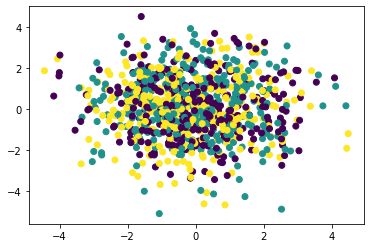

In [63]:
centers = [(0, 0), (0, 0), (0, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5,
                  centers=centers)
y_original = y
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()


In [64]:
y = y_original
y = to_categorical(y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [66]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_19 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_20 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Epoch 1/50
670/670 [==============================] - 0s 235us/step - loss: 1.1479 - accuracy: 0.3388
Epoch 2/50
670/670 [==============================] - 0s 27us/step - loss: 1.1419 - accuracy: 0.3134
Epoch 3/50
670/670 [==============================] - 0s 27us/step - loss: 1.1278 - accuracy: 0.3433
Epoch 4/50
670/670 [==============================] - 0s 27us/step - loss: 1.1342 - accuracy: 0.3612
Epoch 5/50
670/670 [==============================] - 0s 27us/step - loss: 1.1116 - accuracy: 0.3537
Epoch 6/50
670/670 [==============================] - 0s 25us/step - loss: 1.1263 - accuracy: 0.3343
Epoch 7/50
670/670 [==============================] - 0s 25us/step - loss: 1.1118 - accuracy: 0.3582
Epoch 8/50
670/670 [==============================] - 0s 25us/step - loss: 1.1199 - accuracy: 0.3493
Epoch 9/50
670/670 [==============================] - 0s 24us/step - loss: 1.1201 - accuracy: 0.3433
Epoch 10/50
670/670 [==============================] - 0s 25us/step - loss: 1.1101 - accur

In [68]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

330/330 [==============================] - 0s 21us/step
train_acc 0.35671642422676086
test_acc 0.31515151262283325


**Question 5: In this case, try to make the model to overfit with near 100% accuracy on training data while 33% on test data**

In [110]:
# model = Sequential()
# model.add(Dense(4, input_dim=2, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(32768, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3, activation='softmax'))

model = Sequential()
model.add(Dense(1100, input_dim=2, activation='relu'))
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 1100)              3300      
_________________________________________________________________
dense_121 (Dense)            (None, 500)               550500    
_________________________________________________________________
dense_122 (Dense)            (None, 200)               100200    
_________________________________________________________________
dense_123 (Dense)            (None, 3)                 603       
Total params: 654,603
Trainable params: 654,603
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
model.fit(X_train, y_train,
          epochs=10000,
          batch_size=1000)

Epoch 1/10000
670/670 [==============================] - 0s 409us/step - loss: 1.0979 - accuracy: 0.3597
Epoch 2/10000
670/670 [==============================] - 0s 34us/step - loss: 1.0954 - accuracy: 0.3582
Epoch 3/10000
670/670 [==============================] - 0s 36us/step - loss: 1.0915 - accuracy: 0.3701
Epoch 4/10000
670/670 [==============================] - 0s 37us/step - loss: 1.0897 - accuracy: 0.3761
Epoch 5/10000
670/670 [==============================] - 0s 34us/step - loss: 1.0889 - accuracy: 0.3776
Epoch 6/10000
670/670 [==============================] - 0s 37us/step - loss: 1.0874 - accuracy: 0.3836
Epoch 7/10000
670/670 [==============================] - 0s 34us/step - loss: 1.0858 - accuracy: 0.3851
Epoch 8/10000
670/670 [==============================] - 0s 34us/step - loss: 1.0848 - accuracy: 0.3791
Epoch 9/10000
670/670 [==============================] - 0s 37us/step - loss: 1.0836 - accuracy: 0.4030
Epoch 10/10000
670/670 [==============================] - 0s 33

670/670 [==============================] - 0s 39us/step - loss: 1.0202 - accuracy: 0.4701
Epoch 80/10000
670/670 [==============================] - 0s 40us/step - loss: 1.0181 - accuracy: 0.4761
Epoch 81/10000
670/670 [==============================] - 0s 42us/step - loss: 1.0184 - accuracy: 0.4701
Epoch 82/10000
670/670 [==============================] - 0s 39us/step - loss: 1.0187 - accuracy: 0.4746
Epoch 83/10000
670/670 [==============================] - 0s 37us/step - loss: 1.0178 - accuracy: 0.4821
Epoch 84/10000
670/670 [==============================] - 0s 37us/step - loss: 1.0186 - accuracy: 0.4791
Epoch 85/10000
670/670 [==============================] - 0s 39us/step - loss: 1.0155 - accuracy: 0.4627
Epoch 86/10000
670/670 [==============================] - 0s 42us/step - loss: 1.0115 - accuracy: 0.4866
Epoch 87/10000
670/670 [==============================] - 0s 40us/step - loss: 1.0117 - accuracy: 0.4806
Epoch 88/10000
670/670 [==============================] - 0s 39us/step

Epoch 157/10000
670/670 [==============================] - 0s 40us/step - loss: 0.9451 - accuracy: 0.5164
Epoch 158/10000
670/670 [==============================] - 0s 42us/step - loss: 0.9459 - accuracy: 0.5269
Epoch 159/10000
670/670 [==============================] - 0s 45us/step - loss: 0.9486 - accuracy: 0.5284
Epoch 160/10000
670/670 [==============================] - 0s 40us/step - loss: 0.9533 - accuracy: 0.5299
Epoch 161/10000
670/670 [==============================] - 0s 43us/step - loss: 0.9526 - accuracy: 0.5045
Epoch 162/10000
670/670 [==============================] - 0s 39us/step - loss: 0.9459 - accuracy: 0.5284
Epoch 163/10000
670/670 [==============================] - 0s 43us/step - loss: 0.9381 - accuracy: 0.5313
Epoch 164/10000
670/670 [==============================] - 0s 42us/step - loss: 0.9390 - accuracy: 0.5358
Epoch 165/10000
670/670 [==============================] - 0s 42us/step - loss: 0.9435 - accuracy: 0.5388
Epoch 166/10000
670/670 [=====================

Epoch 235/10000
670/670 [==============================] - 0s 36us/step - loss: 0.8808 - accuracy: 0.5836
Epoch 236/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8827 - accuracy: 0.5776
Epoch 237/10000
670/670 [==============================] - 0s 40us/step - loss: 0.8806 - accuracy: 0.5806
Epoch 238/10000
670/670 [==============================] - 0s 36us/step - loss: 0.8764 - accuracy: 0.5925
Epoch 239/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8733 - accuracy: 0.5925
Epoch 240/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8745 - accuracy: 0.5776
Epoch 241/10000
670/670 [==============================] - 0s 37us/step - loss: 0.8768 - accuracy: 0.5955
Epoch 242/10000
670/670 [==============================] - 0s 36us/step - loss: 0.8786 - accuracy: 0.5821
Epoch 243/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8786 - accuracy: 0.5866
Epoch 244/10000
670/670 [=====================

Epoch 313/10000
670/670 [==============================] - 0s 37us/step - loss: 0.8227 - accuracy: 0.6194
Epoch 314/10000
670/670 [==============================] - 0s 40us/step - loss: 0.8307 - accuracy: 0.6194
Epoch 315/10000
670/670 [==============================] - 0s 40us/step - loss: 0.8372 - accuracy: 0.6000
Epoch 316/10000
670/670 [==============================] - 0s 40us/step - loss: 0.8363 - accuracy: 0.6060
Epoch 317/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8263 - accuracy: 0.6164
Epoch 318/10000
670/670 [==============================] - 0s 34us/step - loss: 0.8218 - accuracy: 0.6119
Epoch 319/10000
670/670 [==============================] - 0s 37us/step - loss: 0.8250 - accuracy: 0.6179
Epoch 320/10000
670/670 [==============================] - 0s 39us/step - loss: 0.8303 - accuracy: 0.6000
Epoch 321/10000
670/670 [==============================] - 0s 37us/step - loss: 0.8277 - accuracy: 0.6030
Epoch 322/10000
670/670 [=====================

Epoch 391/10000
670/670 [==============================] - 0s 42us/step - loss: 0.7807 - accuracy: 0.6448
Epoch 392/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7750 - accuracy: 0.6418
Epoch 393/10000
670/670 [==============================] - 0s 37us/step - loss: 0.7709 - accuracy: 0.6552
Epoch 394/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7710 - accuracy: 0.6537
Epoch 395/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7733 - accuracy: 0.6433
Epoch 396/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7770 - accuracy: 0.6418
Epoch 397/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7777 - accuracy: 0.6448
Epoch 398/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7772 - accuracy: 0.6328
Epoch 399/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7744 - accuracy: 0.6478
Epoch 400/10000
670/670 [=====================

Epoch 469/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7366 - accuracy: 0.6761
Epoch 470/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7470 - accuracy: 0.6612
Epoch 471/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7506 - accuracy: 0.6493
Epoch 472/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7579 - accuracy: 0.6478
Epoch 473/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7474 - accuracy: 0.6597
Epoch 474/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7400 - accuracy: 0.6597
Epoch 475/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7320 - accuracy: 0.6806
Epoch 476/10000
670/670 [==============================] - 0s 37us/step - loss: 0.7302 - accuracy: 0.6687
Epoch 477/10000
670/670 [==============================] - 0s 40us/step - loss: 0.7334 - accuracy: 0.6731
Epoch 478/10000
670/670 [=====================

Epoch 547/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6869 - accuracy: 0.6985
Epoch 548/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6883 - accuracy: 0.6985
Epoch 549/10000
670/670 [==============================] - 0s 43us/step - loss: 0.6925 - accuracy: 0.6985
Epoch 550/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6992 - accuracy: 0.6881
Epoch 551/10000
670/670 [==============================] - 0s 36us/step - loss: 0.7019 - accuracy: 0.6896
Epoch 552/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7073 - accuracy: 0.6821
Epoch 553/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7085 - accuracy: 0.6910
Epoch 554/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7138 - accuracy: 0.6612
Epoch 555/10000
670/670 [==============================] - 0s 39us/step - loss: 0.7288 - accuracy: 0.6612
Epoch 556/10000
670/670 [=====================

Epoch 625/10000
670/670 [==============================] - 0s 46us/step - loss: 0.6606 - accuracy: 0.7119
Epoch 626/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6519 - accuracy: 0.7134
Epoch 627/10000
670/670 [==============================] - 0s 45us/step - loss: 0.6495 - accuracy: 0.7269
Epoch 628/10000
670/670 [==============================] - 0s 40us/step - loss: 0.6525 - accuracy: 0.7149
Epoch 629/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6575 - accuracy: 0.7224
Epoch 630/10000
670/670 [==============================] - 0s 40us/step - loss: 0.6602 - accuracy: 0.7254
Epoch 631/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6623 - accuracy: 0.7134
Epoch 632/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6585 - accuracy: 0.7239
Epoch 633/10000
670/670 [==============================] - 0s 43us/step - loss: 0.6540 - accuracy: 0.7209
Epoch 634/10000
670/670 [=====================

Epoch 703/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6267 - accuracy: 0.7269
Epoch 704/10000
670/670 [==============================] - 0s 43us/step - loss: 0.6219 - accuracy: 0.7358
Epoch 705/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6268 - accuracy: 0.7299
Epoch 706/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6348 - accuracy: 0.7164
Epoch 707/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6340 - accuracy: 0.7284
Epoch 708/10000
670/670 [==============================] - 0s 45us/step - loss: 0.6314 - accuracy: 0.7239
Epoch 709/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6223 - accuracy: 0.7418
Epoch 710/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6166 - accuracy: 0.7373
Epoch 711/10000
670/670 [==============================] - 0s 45us/step - loss: 0.6181 - accuracy: 0.7299
Epoch 712/10000
670/670 [=====================

Epoch 781/10000
670/670 [==============================] - 0s 36us/step - loss: 0.6057 - accuracy: 0.7328
Epoch 782/10000
670/670 [==============================] - 0s 43us/step - loss: 0.6086 - accuracy: 0.7388
Epoch 783/10000
670/670 [==============================] - 0s 43us/step - loss: 0.6044 - accuracy: 0.7343
Epoch 784/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5935 - accuracy: 0.7433
Epoch 785/10000
670/670 [==============================] - 0s 45us/step - loss: 0.5869 - accuracy: 0.7418
Epoch 786/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5868 - accuracy: 0.7478
Epoch 787/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5946 - accuracy: 0.7448
Epoch 788/10000
670/670 [==============================] - 0s 37us/step - loss: 0.6040 - accuracy: 0.7254
Epoch 789/10000
670/670 [==============================] - 0s 40us/step - loss: 0.6203 - accuracy: 0.7209
Epoch 790/10000
670/670 [=====================

Epoch 859/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5866 - accuracy: 0.7448
Epoch 860/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5705 - accuracy: 0.7582
Epoch 861/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5603 - accuracy: 0.7597
Epoch 862/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5582 - accuracy: 0.7731
Epoch 863/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5638 - accuracy: 0.7537
Epoch 864/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5696 - accuracy: 0.7627
Epoch 865/10000
670/670 [==============================] - 0s 37us/step - loss: 0.5749 - accuracy: 0.7552
Epoch 866/10000
670/670 [==============================] - 0s 37us/step - loss: 0.5704 - accuracy: 0.7627
Epoch 867/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5641 - accuracy: 0.7597
Epoch 868/10000
670/670 [=====================

Epoch 937/10000
670/670 [==============================] - 0s 43us/step - loss: 0.5773 - accuracy: 0.7358
Epoch 938/10000
670/670 [==============================] - 0s 39us/step - loss: 0.6003 - accuracy: 0.7269
Epoch 939/10000
670/670 [==============================] - 0s 37us/step - loss: 0.5870 - accuracy: 0.7224
Epoch 940/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5840 - accuracy: 0.7343
Epoch 941/10000
670/670 [==============================] - 0s 41us/step - loss: 0.5525 - accuracy: 0.7493
Epoch 942/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5352 - accuracy: 0.7687
Epoch 943/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5364 - accuracy: 0.7761
Epoch 944/10000
670/670 [==============================] - 0s 34us/step - loss: 0.5531 - accuracy: 0.7478
Epoch 945/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5767 - accuracy: 0.7388
Epoch 946/10000
670/670 [=====================

670/670 [==============================] - 0s 45us/step - loss: 0.5337 - accuracy: 0.7806
Epoch 1015/10000
670/670 [==============================] - 0s 46us/step - loss: 0.5233 - accuracy: 0.7791
Epoch 1016/10000
670/670 [==============================] - 0s 43us/step - loss: 0.5086 - accuracy: 0.7881
Epoch 1017/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5035 - accuracy: 0.7940
Epoch 1018/10000
670/670 [==============================] - 0s 46us/step - loss: 0.5085 - accuracy: 0.7940
Epoch 1019/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5189 - accuracy: 0.7791
Epoch 1020/10000
670/670 [==============================] - 0s 46us/step - loss: 0.5300 - accuracy: 0.7672
Epoch 1021/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5341 - accuracy: 0.7746
Epoch 1022/10000
670/670 [==============================] - 0s 46us/step - loss: 0.5330 - accuracy: 0.7642
Epoch 1023/10000
670/670 [============================

Epoch 1091/10000
670/670 [==============================] - 0s 42us/step - loss: 0.4873 - accuracy: 0.8090
Epoch 1092/10000
670/670 [==============================] - 0s 42us/step - loss: 0.4802 - accuracy: 0.8119
Epoch 1093/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4827 - accuracy: 0.8045
Epoch 1094/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4913 - accuracy: 0.7970
Epoch 1095/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5024 - accuracy: 0.7910
Epoch 1096/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5055 - accuracy: 0.7776
Epoch 1097/10000
670/670 [==============================] - 0s 39us/step - loss: 0.5077 - accuracy: 0.7896
Epoch 1098/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4987 - accuracy: 0.7896
Epoch 1099/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4921 - accuracy: 0.7881
Epoch 1100/10000
670/670 [===========

Epoch 1168/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4780 - accuracy: 0.7910
Epoch 1169/10000
670/670 [==============================] - 0s 43us/step - loss: 0.4923 - accuracy: 0.7806
Epoch 1170/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5036 - accuracy: 0.7537
Epoch 1171/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5293 - accuracy: 0.7612
Epoch 1172/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5213 - accuracy: 0.7552
Epoch 1173/10000
670/670 [==============================] - 0s 40us/step - loss: 0.5297 - accuracy: 0.7582
Epoch 1174/10000
670/670 [==============================] - 0s 42us/step - loss: 0.5116 - accuracy: 0.7731
Epoch 1175/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4889 - accuracy: 0.7866
Epoch 1176/10000
670/670 [==============================] - 0s 45us/step - loss: 0.4794 - accuracy: 0.8015
Epoch 1177/10000
670/670 [===========

Epoch 1245/10000
670/670 [==============================] - 0s 48us/step - loss: 0.4746 - accuracy: 0.8060
Epoch 1246/10000
670/670 [==============================] - 0s 46us/step - loss: 0.4585 - accuracy: 0.8149
Epoch 1247/10000
670/670 [==============================] - 0s 46us/step - loss: 0.4478 - accuracy: 0.8209
Epoch 1248/10000
670/670 [==============================] - 0s 42us/step - loss: 0.4448 - accuracy: 0.8239
Epoch 1249/10000
670/670 [==============================] - 0s 48us/step - loss: 0.4504 - accuracy: 0.8134
Epoch 1250/10000
670/670 [==============================] - 0s 60us/step - loss: 0.4578 - accuracy: 0.8119
Epoch 1251/10000
670/670 [==============================] - 0s 46us/step - loss: 0.4659 - accuracy: 0.8015
Epoch 1252/10000
670/670 [==============================] - 0s 43us/step - loss: 0.4585 - accuracy: 0.8119
Epoch 1253/10000
670/670 [==============================] - 0s 48us/step - loss: 0.4516 - accuracy: 0.8134
Epoch 1254/10000
670/670 [===========

Epoch 1322/10000
670/670 [==============================] - 0s 42us/step - loss: 0.4387 - accuracy: 0.8239
Epoch 1323/10000
670/670 [==============================] - 0s 45us/step - loss: 0.4283 - accuracy: 0.8313
Epoch 1324/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4201 - accuracy: 0.8448
Epoch 1325/10000
670/670 [==============================] - 0s 43us/step - loss: 0.4189 - accuracy: 0.8463
Epoch 1326/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4237 - accuracy: 0.8313
Epoch 1327/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4319 - accuracy: 0.8284
Epoch 1328/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4402 - accuracy: 0.8075
Epoch 1329/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4488 - accuracy: 0.8060
Epoch 1330/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4485 - accuracy: 0.7940
Epoch 1331/10000
670/670 [===========

Epoch 1399/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4139 - accuracy: 0.8478
Epoch 1400/10000
670/670 [==============================] - 0s 42us/step - loss: 0.4226 - accuracy: 0.8373
Epoch 1401/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4273 - accuracy: 0.8373
Epoch 1402/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4302 - accuracy: 0.8269
Epoch 1403/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4222 - accuracy: 0.8388
Epoch 1404/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4148 - accuracy: 0.8433
Epoch 1405/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4068 - accuracy: 0.8478
Epoch 1406/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4037 - accuracy: 0.8388
Epoch 1407/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4067 - accuracy: 0.8448
Epoch 1408/10000
670/670 [===========

Epoch 1476/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4024 - accuracy: 0.8418
Epoch 1477/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4001 - accuracy: 0.8537
Epoch 1478/10000
670/670 [==============================] - 0s 36us/step - loss: 0.3990 - accuracy: 0.8433
Epoch 1479/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3982 - accuracy: 0.8448
Epoch 1480/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4010 - accuracy: 0.8299
Epoch 1481/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4141 - accuracy: 0.8299
Epoch 1482/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4296 - accuracy: 0.8000
Epoch 1483/10000
670/670 [==============================] - 0s 40us/step - loss: 0.4508 - accuracy: 0.8119
Epoch 1484/10000
670/670 [==============================] - 0s 36us/step - loss: 0.4611 - accuracy: 0.7746
Epoch 1485/10000
670/670 [===========

Epoch 1553/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3911 - accuracy: 0.8463
Epoch 1554/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3954 - accuracy: 0.8433
Epoch 1555/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3942 - accuracy: 0.8463
Epoch 1556/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3850 - accuracy: 0.8507
Epoch 1557/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3752 - accuracy: 0.8731
Epoch 1558/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3697 - accuracy: 0.8642
Epoch 1559/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3702 - accuracy: 0.8701
Epoch 1560/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3745 - accuracy: 0.8597
Epoch 1561/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3803 - accuracy: 0.8537
Epoch 1562/10000
670/670 [===========

Epoch 1630/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4036 - accuracy: 0.8328
Epoch 1631/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3936 - accuracy: 0.8269
Epoch 1632/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3801 - accuracy: 0.8433
Epoch 1633/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3742 - accuracy: 0.8567
Epoch 1634/10000
670/670 [==============================] - 0s 36us/step - loss: 0.3730 - accuracy: 0.8448
Epoch 1635/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3765 - accuracy: 0.8507
Epoch 1636/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3849 - accuracy: 0.8373
Epoch 1637/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3824 - accuracy: 0.8478
Epoch 1638/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3758 - accuracy: 0.8522
Epoch 1639/10000
670/670 [===========

Epoch 1707/10000
670/670 [==============================] - 0s 43us/step - loss: 0.3668 - accuracy: 0.8522
Epoch 1708/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3566 - accuracy: 0.8701
Epoch 1709/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3495 - accuracy: 0.8746
Epoch 1710/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3476 - accuracy: 0.8806
Epoch 1711/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3537 - accuracy: 0.8612
Epoch 1712/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3637 - accuracy: 0.8418
Epoch 1713/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3818 - accuracy: 0.8433
Epoch 1714/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3874 - accuracy: 0.8239
Epoch 1715/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3992 - accuracy: 0.8284
Epoch 1716/10000
670/670 [===========

Epoch 1784/10000
670/670 [==============================] - 0s 46us/step - loss: 0.3515 - accuracy: 0.8582
Epoch 1785/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3517 - accuracy: 0.8552
Epoch 1786/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3466 - accuracy: 0.8627
Epoch 1787/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3424 - accuracy: 0.8761
Epoch 1788/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3457 - accuracy: 0.8687
Epoch 1789/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3545 - accuracy: 0.8642
Epoch 1790/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3626 - accuracy: 0.8552
Epoch 1791/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3730 - accuracy: 0.8448
Epoch 1792/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3663 - accuracy: 0.8493
Epoch 1793/10000
670/670 [===========

Epoch 1861/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3427 - accuracy: 0.8522
Epoch 1862/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3406 - accuracy: 0.8672
Epoch 1863/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3309 - accuracy: 0.8731
Epoch 1864/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3275 - accuracy: 0.8836
Epoch 1865/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3289 - accuracy: 0.8881
Epoch 1866/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3314 - accuracy: 0.8701
Epoch 1867/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3312 - accuracy: 0.8881
Epoch 1868/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3301 - accuracy: 0.8731
Epoch 1869/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3242 - accuracy: 0.8896
Epoch 1870/10000
670/670 [===========

Epoch 1938/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3107 - accuracy: 0.8940
Epoch 1939/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3122 - accuracy: 0.8896
Epoch 1940/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3184 - accuracy: 0.8940
Epoch 1941/10000
670/670 [==============================] - 0s 34us/step - loss: 0.3262 - accuracy: 0.8731
Epoch 1942/10000
670/670 [==============================] - 0s 34us/step - loss: 0.3293 - accuracy: 0.8836
Epoch 1943/10000
670/670 [==============================] - 0s 34us/step - loss: 0.3279 - accuracy: 0.8716
Epoch 1944/10000
670/670 [==============================] - 0s 34us/step - loss: 0.3208 - accuracy: 0.8940
Epoch 1945/10000
670/670 [==============================] - 0s 34us/step - loss: 0.3124 - accuracy: 0.8821
Epoch 1946/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3080 - accuracy: 0.8970
Epoch 1947/10000
670/670 [===========

Epoch 2015/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2946 - accuracy: 0.9119
Epoch 2016/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2938 - accuracy: 0.9179
Epoch 2017/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2987 - accuracy: 0.8955
Epoch 2018/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3052 - accuracy: 0.9000
Epoch 2019/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3104 - accuracy: 0.8806
Epoch 2020/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3118 - accuracy: 0.8985
Epoch 2021/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3084 - accuracy: 0.8836
Epoch 2022/10000
670/670 [==============================] - 0s 36us/step - loss: 0.3051 - accuracy: 0.8925
Epoch 2023/10000
670/670 [==============================] - 0s 43us/step - loss: 0.3017 - accuracy: 0.8896
Epoch 2024/10000
670/670 [===========

Epoch 2092/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3057 - accuracy: 0.8836
Epoch 2093/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3007 - accuracy: 0.8836
Epoch 2094/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2984 - accuracy: 0.8925
Epoch 2095/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2997 - accuracy: 0.8940
Epoch 2096/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3025 - accuracy: 0.8970
Epoch 2097/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3009 - accuracy: 0.8806
Epoch 2098/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2960 - accuracy: 0.9045
Epoch 2099/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2904 - accuracy: 0.8925
Epoch 2100/10000
670/670 [==============================] - 0s 34us/step - loss: 0.2845 - accuracy: 0.9119
Epoch 2101/10000
670/670 [===========

Epoch 2169/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2740 - accuracy: 0.9104
Epoch 2170/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2800 - accuracy: 0.9030
Epoch 2171/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2936 - accuracy: 0.8955
Epoch 2172/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3090 - accuracy: 0.8776
Epoch 2173/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3228 - accuracy: 0.8582
Epoch 2174/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3211 - accuracy: 0.8731
Epoch 2175/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3109 - accuracy: 0.8776
Epoch 2176/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3001 - accuracy: 0.8806
Epoch 2177/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2884 - accuracy: 0.8955
Epoch 2178/10000
670/670 [===========

Epoch 2246/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2831 - accuracy: 0.9000
Epoch 2247/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2753 - accuracy: 0.8970
Epoch 2248/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2721 - accuracy: 0.9045
Epoch 2249/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2754 - accuracy: 0.9119
Epoch 2250/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2824 - accuracy: 0.8955
Epoch 2251/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2946 - accuracy: 0.8881
Epoch 2252/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3007 - accuracy: 0.8672
Epoch 2253/10000
670/670 [==============================] - 0s 43us/step - loss: 0.3046 - accuracy: 0.8731
Epoch 2254/10000
670/670 [==============================] - 0s 49us/step - loss: 0.2963 - accuracy: 0.8687
Epoch 2255/10000
670/670 [===========

Epoch 2323/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2539 - accuracy: 0.9239
Epoch 2324/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2585 - accuracy: 0.9224
Epoch 2325/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2643 - accuracy: 0.8970
Epoch 2326/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2685 - accuracy: 0.9045
Epoch 2327/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2712 - accuracy: 0.9015
Epoch 2328/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2713 - accuracy: 0.9045
Epoch 2329/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2705 - accuracy: 0.9000
Epoch 2330/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2724 - accuracy: 0.9045
Epoch 2331/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2762 - accuracy: 0.8925
Epoch 2332/10000
670/670 [===========

Epoch 2400/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2530 - accuracy: 0.9134
Epoch 2401/10000
670/670 [==============================] - 0s 45us/step - loss: 0.2557 - accuracy: 0.9104
Epoch 2402/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2652 - accuracy: 0.8955
Epoch 2403/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2698 - accuracy: 0.9090
Epoch 2404/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2724 - accuracy: 0.8955
Epoch 2405/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2649 - accuracy: 0.9060
Epoch 2406/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2561 - accuracy: 0.9104
Epoch 2407/10000
670/670 [==============================] - 0s 34us/step - loss: 0.2521 - accuracy: 0.9209
Epoch 2408/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2532 - accuracy: 0.9179
Epoch 2409/10000
670/670 [===========

Epoch 2477/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2796 - accuracy: 0.8866
Epoch 2478/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2945 - accuracy: 0.8731
Epoch 2479/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2955 - accuracy: 0.8731
Epoch 2480/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2940 - accuracy: 0.8776
Epoch 2481/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2695 - accuracy: 0.8940
Epoch 2482/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2548 - accuracy: 0.9134
Epoch 2483/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2447 - accuracy: 0.9209
Epoch 2484/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2464 - accuracy: 0.9134
Epoch 2485/10000
670/670 [==============================] - 0s 38us/step - loss: 0.2536 - accuracy: 0.9209
Epoch 2486/10000
670/670 [===========

Epoch 2554/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2536 - accuracy: 0.9000
Epoch 2555/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2492 - accuracy: 0.9045
Epoch 2556/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2423 - accuracy: 0.9119
Epoch 2557/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2435 - accuracy: 0.9134
Epoch 2558/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2503 - accuracy: 0.9134
Epoch 2559/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2598 - accuracy: 0.8970
Epoch 2560/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2741 - accuracy: 0.8866
Epoch 2561/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2720 - accuracy: 0.8866
Epoch 2562/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2683 - accuracy: 0.8940
Epoch 2563/10000
670/670 [===========

Epoch 2631/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2251 - accuracy: 0.9284
Epoch 2632/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2339 - accuracy: 0.9134
Epoch 2633/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2393 - accuracy: 0.9134
Epoch 2634/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2394 - accuracy: 0.9119
Epoch 2635/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2364 - accuracy: 0.9179
Epoch 2636/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2319 - accuracy: 0.9224
Epoch 2637/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2336 - accuracy: 0.9164
Epoch 2638/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2409 - accuracy: 0.9149
Epoch 2639/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2525 - accuracy: 0.8985
Epoch 2640/10000
670/670 [===========

Epoch 2708/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2147 - accuracy: 0.9433
Epoch 2709/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2110 - accuracy: 0.9403
Epoch 2710/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2157 - accuracy: 0.9299
Epoch 2711/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2241 - accuracy: 0.9269
Epoch 2712/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2310 - accuracy: 0.9164
Epoch 2713/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2328 - accuracy: 0.9164
Epoch 2714/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2307 - accuracy: 0.9090
Epoch 2715/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2295 - accuracy: 0.9224
Epoch 2716/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2259 - accuracy: 0.9194
Epoch 2717/10000
670/670 [===========

Epoch 2785/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2525 - accuracy: 0.8940
Epoch 2786/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2447 - accuracy: 0.8970
Epoch 2787/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2291 - accuracy: 0.9119
Epoch 2788/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2126 - accuracy: 0.9418
Epoch 2789/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2038 - accuracy: 0.9403
Epoch 2790/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2061 - accuracy: 0.9418
Epoch 2791/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2166 - accuracy: 0.9328
Epoch 2792/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2285 - accuracy: 0.9134
Epoch 2793/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2416 - accuracy: 0.9090
Epoch 2794/10000
670/670 [===========

Epoch 2862/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2497 - accuracy: 0.8955
Epoch 2863/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2358 - accuracy: 0.9149
Epoch 2864/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2435 - accuracy: 0.9000
Epoch 2865/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2464 - accuracy: 0.8866
Epoch 2866/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2630 - accuracy: 0.8896
Epoch 2867/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2668 - accuracy: 0.8896
Epoch 2868/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2417 - accuracy: 0.9015
Epoch 2869/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2398 - accuracy: 0.9090
Epoch 2870/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.9015
Epoch 2871/10000
670/670 [===========

Epoch 2939/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2218 - accuracy: 0.9179
Epoch 2940/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2227 - accuracy: 0.9119
Epoch 2941/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2242 - accuracy: 0.9179
Epoch 2942/10000
670/670 [==============================] - 0s 36us/step - loss: 0.2157 - accuracy: 0.9179
Epoch 2943/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2096 - accuracy: 0.9254
Epoch 2944/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2012 - accuracy: 0.9299
Epoch 2945/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1984 - accuracy: 0.9373
Epoch 2946/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2003 - accuracy: 0.9328
Epoch 2947/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2036 - accuracy: 0.9299
Epoch 2948/10000
670/670 [===========

Epoch 3016/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2241 - accuracy: 0.9104
Epoch 3017/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2208 - accuracy: 0.9164
Epoch 3018/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2160 - accuracy: 0.9164
Epoch 3019/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1959 - accuracy: 0.9343
Epoch 3020/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1853 - accuracy: 0.9463
Epoch 3021/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1870 - accuracy: 0.9478
Epoch 3022/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1969 - accuracy: 0.9328
Epoch 3023/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2056 - accuracy: 0.9284
Epoch 3024/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2048 - accuracy: 0.9284
Epoch 3025/10000
670/670 [===========

Epoch 3093/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1767 - accuracy: 0.9537
Epoch 3094/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1807 - accuracy: 0.9463
Epoch 3095/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1863 - accuracy: 0.9493
Epoch 3096/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1929 - accuracy: 0.9343
Epoch 3097/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1949 - accuracy: 0.9403
Epoch 3098/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1951 - accuracy: 0.9269
Epoch 3099/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1921 - accuracy: 0.9388
Epoch 3100/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1883 - accuracy: 0.9388
Epoch 3101/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1861 - accuracy: 0.9463
Epoch 3102/10000
670/670 [===========

Epoch 3170/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2100 - accuracy: 0.9194
Epoch 3171/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2082 - accuracy: 0.9194
Epoch 3172/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2046 - accuracy: 0.9224
Epoch 3173/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1905 - accuracy: 0.9254
Epoch 3174/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1787 - accuracy: 0.9507
Epoch 3175/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1712 - accuracy: 0.9552
Epoch 3176/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1721 - accuracy: 0.9537
Epoch 3177/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1784 - accuracy: 0.9522
Epoch 3178/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1873 - accuracy: 0.9388
Epoch 3179/10000
670/670 [===========

Epoch 3247/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1741 - accuracy: 0.9478
Epoch 3248/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1708 - accuracy: 0.9448
Epoch 3249/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1728 - accuracy: 0.9537
Epoch 3250/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1780 - accuracy: 0.9448
Epoch 3251/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1830 - accuracy: 0.9418
Epoch 3252/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1892 - accuracy: 0.9358
Epoch 3253/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1907 - accuracy: 0.9343
Epoch 3254/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1888 - accuracy: 0.9328
Epoch 3255/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1825 - accuracy: 0.9418
Epoch 3256/10000
670/670 [===========

Epoch 3324/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2110 - accuracy: 0.9179
Epoch 3325/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2130 - accuracy: 0.9164
Epoch 3326/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2029 - accuracy: 0.9209
Epoch 3327/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1824 - accuracy: 0.9418
Epoch 3328/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2224 - accuracy: 0.9119
Epoch 3329/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2185 - accuracy: 0.9164
Epoch 3330/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1687 - accuracy: 0.9463
Epoch 3331/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1999 - accuracy: 0.9239
Epoch 3332/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2045 - accuracy: 0.9299
Epoch 3333/10000
670/670 [===========

Epoch 3401/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1522 - accuracy: 0.9657
Epoch 3402/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1522 - accuracy: 0.9672
Epoch 3403/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1521 - accuracy: 0.9642
Epoch 3404/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1520 - accuracy: 0.9672
Epoch 3405/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1520 - accuracy: 0.9657
Epoch 3406/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1519 - accuracy: 0.9657
Epoch 3407/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1518 - accuracy: 0.9657
Epoch 3408/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1518 - accuracy: 0.9657
Epoch 3409/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1517 - accuracy: 0.9657
Epoch 3410/10000
670/670 [===========

Epoch 3478/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1469 - accuracy: 0.9687
Epoch 3479/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1469 - accuracy: 0.9642
Epoch 3480/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1474 - accuracy: 0.9657
Epoch 3481/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1484 - accuracy: 0.9612
Epoch 3482/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1500 - accuracy: 0.9582
Epoch 3483/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1526 - accuracy: 0.9597
Epoch 3484/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1556 - accuracy: 0.9567
Epoch 3485/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1603 - accuracy: 0.9537
Epoch 3486/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1641 - accuracy: 0.9478
Epoch 3487/10000
670/670 [===========

Epoch 3555/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1459 - accuracy: 0.9597
Epoch 3556/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1490 - accuracy: 0.9537
Epoch 3557/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1527 - accuracy: 0.9522
Epoch 3558/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1564 - accuracy: 0.9507
Epoch 3559/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1597 - accuracy: 0.9478
Epoch 3560/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1641 - accuracy: 0.9478
Epoch 3561/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1648 - accuracy: 0.9493
Epoch 3562/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1695 - accuracy: 0.9507
Epoch 3563/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1675 - accuracy: 0.9418
Epoch 3564/10000
670/670 [===========

Epoch 3632/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1731 - accuracy: 0.9343
Epoch 3633/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1815 - accuracy: 0.9373
Epoch 3634/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1726 - accuracy: 0.9313
Epoch 3635/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1623 - accuracy: 0.9552
Epoch 3636/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1471 - accuracy: 0.9597
Epoch 3637/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1392 - accuracy: 0.9612
Epoch 3638/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1402 - accuracy: 0.9687
Epoch 3639/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1470 - accuracy: 0.9552
Epoch 3640/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1563 - accuracy: 0.9537
Epoch 3641/10000
670/670 [===========

Epoch 3709/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3997 - accuracy: 0.8299
Epoch 3710/10000
670/670 [==============================] - 0s 37us/step - loss: 0.4083 - accuracy: 0.8224
Epoch 3711/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3365 - accuracy: 0.8507
Epoch 3712/10000
670/670 [==============================] - 0s 39us/step - loss: 0.4055 - accuracy: 0.8254
Epoch 3713/10000
670/670 [==============================] - 0s 40us/step - loss: 0.3246 - accuracy: 0.8642
Epoch 3714/10000
670/670 [==============================] - 0s 36us/step - loss: 0.3064 - accuracy: 0.8731
Epoch 3715/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3419 - accuracy: 0.8478
Epoch 3716/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2604 - accuracy: 0.8985
Epoch 3717/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2914 - accuracy: 0.8642
Epoch 3718/10000
670/670 [===========

Epoch 3786/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1568 - accuracy: 0.9716
Epoch 3787/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1566 - accuracy: 0.9716
Epoch 3788/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1566 - accuracy: 0.9701
Epoch 3789/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1564 - accuracy: 0.9716
Epoch 3790/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1562 - accuracy: 0.9701
Epoch 3791/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1561 - accuracy: 0.9716
Epoch 3792/10000
670/670 [==============================] - 0s 48us/step - loss: 0.1559 - accuracy: 0.9701
Epoch 3793/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1557 - accuracy: 0.9701
Epoch 3794/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1556 - accuracy: 0.9687
Epoch 3795/10000
670/670 [===========

Epoch 3863/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1487 - accuracy: 0.9687
Epoch 3864/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1487 - accuracy: 0.9701
Epoch 3865/10000
670/670 [==============================] - 0s 48us/step - loss: 0.1486 - accuracy: 0.9716
Epoch 3866/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1485 - accuracy: 0.9716
Epoch 3867/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1484 - accuracy: 0.9716
Epoch 3868/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1483 - accuracy: 0.9716
Epoch 3869/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1483 - accuracy: 0.9701
Epoch 3870/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1482 - accuracy: 0.9687
Epoch 3871/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1482 - accuracy: 0.9672
Epoch 3872/10000
670/670 [===========

Epoch 3940/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1431 - accuracy: 0.9687
Epoch 3941/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1430 - accuracy: 0.9687
Epoch 3942/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1429 - accuracy: 0.9687
Epoch 3943/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1429 - accuracy: 0.9716
Epoch 3944/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1428 - accuracy: 0.9687
Epoch 3945/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1427 - accuracy: 0.9701
Epoch 3946/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1427 - accuracy: 0.9701
Epoch 3947/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1426 - accuracy: 0.9672
Epoch 3948/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1425 - accuracy: 0.9701
Epoch 3949/10000
670/670 [===========

Epoch 4017/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1380 - accuracy: 0.9687
Epoch 4018/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1379 - accuracy: 0.9672
Epoch 4019/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1378 - accuracy: 0.9672
Epoch 4020/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1378 - accuracy: 0.9701
Epoch 4021/10000
670/670 [==============================] - 0s 34us/step - loss: 0.1378 - accuracy: 0.9687
Epoch 4022/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1377 - accuracy: 0.9687
Epoch 4023/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1376 - accuracy: 0.9687
Epoch 4024/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1375 - accuracy: 0.9701
Epoch 4025/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1375 - accuracy: 0.9716
Epoch 4026/10000
670/670 [===========

Epoch 4094/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1332 - accuracy: 0.9687
Epoch 4095/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1332 - accuracy: 0.9731
Epoch 4096/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1331 - accuracy: 0.9701
Epoch 4097/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1330 - accuracy: 0.9701
Epoch 4098/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1329 - accuracy: 0.9687
Epoch 4099/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1329 - accuracy: 0.9687
Epoch 4100/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1328 - accuracy: 0.9701
Epoch 4101/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1328 - accuracy: 0.9716
Epoch 4102/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1327 - accuracy: 0.9687
Epoch 4103/10000
670/670 [===========

Epoch 4171/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1285 - accuracy: 0.9746
Epoch 4172/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1284 - accuracy: 0.9731
Epoch 4173/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1284 - accuracy: 0.9731
Epoch 4174/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1283 - accuracy: 0.9731
Epoch 4175/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1283 - accuracy: 0.9716
Epoch 4176/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1282 - accuracy: 0.9731
Epoch 4177/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1281 - accuracy: 0.9716
Epoch 4178/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1281 - accuracy: 0.9731
Epoch 4179/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1280 - accuracy: 0.9731
Epoch 4180/10000
670/670 [===========

Epoch 4248/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1241 - accuracy: 0.9746
Epoch 4249/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1240 - accuracy: 0.9746
Epoch 4250/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1240 - accuracy: 0.9746
Epoch 4251/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1240 - accuracy: 0.9761
Epoch 4252/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1239 - accuracy: 0.9746
Epoch 4253/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1238 - accuracy: 0.9731
Epoch 4254/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1238 - accuracy: 0.9746
Epoch 4255/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1237 - accuracy: 0.9731
Epoch 4256/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1237 - accuracy: 0.9746
Epoch 4257/10000
670/670 [===========

Epoch 4325/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1197 - accuracy: 0.9746
Epoch 4326/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1197 - accuracy: 0.9746
Epoch 4327/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1197 - accuracy: 0.9746
Epoch 4328/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1197 - accuracy: 0.9746
Epoch 4329/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1196 - accuracy: 0.9761
Epoch 4330/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1195 - accuracy: 0.9746
Epoch 4331/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1195 - accuracy: 0.9731
Epoch 4332/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1195 - accuracy: 0.9746
Epoch 4333/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1194 - accuracy: 0.9746
Epoch 4334/10000
670/670 [===========

Epoch 4402/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1156 - accuracy: 0.9761
Epoch 4403/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1155 - accuracy: 0.9761
Epoch 4404/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1154 - accuracy: 0.9746
Epoch 4405/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1153 - accuracy: 0.9746
Epoch 4406/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1153 - accuracy: 0.9746
Epoch 4407/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1152 - accuracy: 0.9746
Epoch 4408/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1151 - accuracy: 0.9761
Epoch 4409/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1151 - accuracy: 0.9746
Epoch 4410/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1151 - accuracy: 0.9776
Epoch 4411/10000
670/670 [===========

Epoch 4479/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1122 - accuracy: 0.9731
Epoch 4480/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1122 - accuracy: 0.9836
Epoch 4481/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1120 - accuracy: 0.9731
Epoch 4482/10000
670/670 [==============================] - 0s 34us/step - loss: 0.1118 - accuracy: 0.9776
Epoch 4483/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1116 - accuracy: 0.9746
Epoch 4484/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1115 - accuracy: 0.9791
Epoch 4485/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1114 - accuracy: 0.9761
Epoch 4486/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1113 - accuracy: 0.9821
Epoch 4487/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1111 - accuracy: 0.9746
Epoch 4488/10000
670/670 [===========

Epoch 4556/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1080 - accuracy: 0.9821
Epoch 4557/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1079 - accuracy: 0.9776
Epoch 4558/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1086 - accuracy: 0.9761
Epoch 4559/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1097 - accuracy: 0.9836
Epoch 4560/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1105 - accuracy: 0.9701
Epoch 4561/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1115 - accuracy: 0.9791
Epoch 4562/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1130 - accuracy: 0.9731
Epoch 4563/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1146 - accuracy: 0.9731
Epoch 4564/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1165 - accuracy: 0.9701
Epoch 4565/10000
670/670 [===========

Epoch 4633/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1139 - accuracy: 0.9746
Epoch 4634/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1120 - accuracy: 0.9672
Epoch 4635/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1103 - accuracy: 0.9776
Epoch 4636/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1075 - accuracy: 0.9701
Epoch 4637/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1053 - accuracy: 0.9836
Epoch 4638/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1036 - accuracy: 0.9791
Epoch 4639/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1032 - accuracy: 0.9791
Epoch 4640/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1034 - accuracy: 0.9836
Epoch 4641/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1043 - accuracy: 0.9761
Epoch 4642/10000
670/670 [===========

Epoch 4710/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1037 - accuracy: 0.9821
Epoch 4711/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1066 - accuracy: 0.9731
Epoch 4712/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1104 - accuracy: 0.9776
Epoch 4713/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1145 - accuracy: 0.9657
Epoch 4714/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1184 - accuracy: 0.9716
Epoch 4715/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1223 - accuracy: 0.9642
Epoch 4716/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1234 - accuracy: 0.9701
Epoch 4717/10000
670/670 [==============================] - 0s 44us/step - loss: 0.1250 - accuracy: 0.9582
Epoch 4718/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1229 - accuracy: 0.9716
Epoch 4719/10000
670/670 [===========

Epoch 4787/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1064 - accuracy: 0.9716
Epoch 4788/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1011 - accuracy: 0.9761
Epoch 4789/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1028 - accuracy: 0.9776
Epoch 4790/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1074 - accuracy: 0.9687
Epoch 4791/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1137 - accuracy: 0.9716
Epoch 4792/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1175 - accuracy: 0.9612
Epoch 4793/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1197 - accuracy: 0.9672
Epoch 4794/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1210 - accuracy: 0.9612
Epoch 4795/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1135 - accuracy: 0.9761
Epoch 4796/10000
670/670 [===========

Epoch 4864/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1083 - accuracy: 0.9672
Epoch 4865/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1163 - accuracy: 0.9597
Epoch 4866/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1405 - accuracy: 0.9582
Epoch 4867/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1766 - accuracy: 0.9164
Epoch 4868/10000
670/670 [==============================] - 0s 43us/step - loss: 0.3347 - accuracy: 0.8716
Epoch 4869/10000
670/670 [==============================] - 0s 42us/step - loss: 0.6651 - accuracy: 0.7761
Epoch 4870/10000
670/670 [==============================] - 0s 43us/step - loss: 2.0318 - accuracy: 0.7149
Epoch 4871/10000
670/670 [==============================] - 0s 46us/step - loss: 1.8443 - accuracy: 0.6537
Epoch 4872/10000
670/670 [==============================] - 0s 43us/step - loss: 2.5098 - accuracy: 0.6134
Epoch 4873/10000
670/670 [===========

Epoch 4941/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1393 - accuracy: 0.9687
Epoch 4942/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1403 - accuracy: 0.9716
Epoch 4943/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1397 - accuracy: 0.9701
Epoch 4944/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1377 - accuracy: 0.9687
Epoch 4945/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1381 - accuracy: 0.9687
Epoch 4946/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1373 - accuracy: 0.9657
Epoch 4947/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1360 - accuracy: 0.9731
Epoch 4948/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1361 - accuracy: 0.9701
Epoch 4949/10000
670/670 [==============================] - 0s 51us/step - loss: 0.1351 - accuracy: 0.9746
Epoch 4950/10000
670/670 [===========

Epoch 5018/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1213 - accuracy: 0.9791
Epoch 5019/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1213 - accuracy: 0.9776
Epoch 5020/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1212 - accuracy: 0.9791
Epoch 5021/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1211 - accuracy: 0.9791
Epoch 5022/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1210 - accuracy: 0.9791
Epoch 5023/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1209 - accuracy: 0.9776
Epoch 5024/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1208 - accuracy: 0.9791
Epoch 5025/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1206 - accuracy: 0.9791
Epoch 5026/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1206 - accuracy: 0.9791
Epoch 5027/10000
670/670 [===========

Epoch 5095/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1151 - accuracy: 0.9791
Epoch 5096/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1150 - accuracy: 0.9806
Epoch 5097/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1149 - accuracy: 0.9806
Epoch 5098/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1148 - accuracy: 0.9806
Epoch 5099/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1148 - accuracy: 0.9806
Epoch 5100/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1147 - accuracy: 0.9806
Epoch 5101/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1146 - accuracy: 0.9806
Epoch 5102/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1145 - accuracy: 0.9806
Epoch 5103/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1144 - accuracy: 0.9791
Epoch 5104/10000
670/670 [===========

Epoch 5172/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1100 - accuracy: 0.9821
Epoch 5173/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1100 - accuracy: 0.9821
Epoch 5174/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1099 - accuracy: 0.9836
Epoch 5175/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1099 - accuracy: 0.9821
Epoch 5176/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1098 - accuracy: 0.9821
Epoch 5177/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1098 - accuracy: 0.9821
Epoch 5178/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1097 - accuracy: 0.9821
Epoch 5179/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1097 - accuracy: 0.9821
Epoch 5180/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1097 - accuracy: 0.9806
Epoch 5181/10000
670/670 [===========

Epoch 5249/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1059 - accuracy: 0.9851
Epoch 5250/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1058 - accuracy: 0.9836
Epoch 5251/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1057 - accuracy: 0.9866
Epoch 5252/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1057 - accuracy: 0.9866
Epoch 5253/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1056 - accuracy: 0.9851
Epoch 5254/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1056 - accuracy: 0.9836
Epoch 5255/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1055 - accuracy: 0.9836
Epoch 5256/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1054 - accuracy: 0.9836
Epoch 5257/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1054 - accuracy: 0.9836
Epoch 5258/10000
670/670 [===========

Epoch 5326/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1019 - accuracy: 0.9851
Epoch 5327/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1019 - accuracy: 0.9866
Epoch 5328/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1018 - accuracy: 0.9866
Epoch 5329/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1018 - accuracy: 0.9866
Epoch 5330/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1017 - accuracy: 0.9866
Epoch 5331/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1017 - accuracy: 0.9866
Epoch 5332/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1016 - accuracy: 0.9866
Epoch 5333/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1016 - accuracy: 0.9866
Epoch 5334/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1015 - accuracy: 0.9866
Epoch 5335/10000
670/670 [===========

Epoch 5403/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0981 - accuracy: 0.9881
Epoch 5404/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0980 - accuracy: 0.9896
Epoch 5405/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0980 - accuracy: 0.9881
Epoch 5406/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0980 - accuracy: 0.9881
Epoch 5407/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0979 - accuracy: 0.9896
Epoch 5408/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0978 - accuracy: 0.9896
Epoch 5409/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0978 - accuracy: 0.9881
Epoch 5410/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0977 - accuracy: 0.9896
Epoch 5411/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0977 - accuracy: 0.9896
Epoch 5412/10000
670/670 [===========

Epoch 5480/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0946 - accuracy: 0.9881
Epoch 5481/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0946 - accuracy: 0.9896
Epoch 5482/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0945 - accuracy: 0.9896
Epoch 5483/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0944 - accuracy: 0.9896
Epoch 5484/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0944 - accuracy: 0.9896
Epoch 5485/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0944 - accuracy: 0.9896
Epoch 5486/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0943 - accuracy: 0.9896
Epoch 5487/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0943 - accuracy: 0.9896
Epoch 5488/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0942 - accuracy: 0.9896
Epoch 5489/10000
670/670 [===========

Epoch 5557/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0910 - accuracy: 0.9896
Epoch 5558/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0910 - accuracy: 0.9896
Epoch 5559/10000
670/670 [==============================] - 0s 34us/step - loss: 0.0909 - accuracy: 0.9896
Epoch 5560/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0909 - accuracy: 0.9896
Epoch 5561/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0909 - accuracy: 0.9896
Epoch 5562/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0908 - accuracy: 0.9896
Epoch 5563/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0908 - accuracy: 0.9896
Epoch 5564/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0908 - accuracy: 0.9896
Epoch 5565/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0907 - accuracy: 0.9910
Epoch 5566/10000
670/670 [===========

Epoch 5634/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0878 - accuracy: 0.9896
Epoch 5635/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0878 - accuracy: 0.9896
Epoch 5636/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0877 - accuracy: 0.9896
Epoch 5637/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0877 - accuracy: 0.9896
Epoch 5638/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0876 - accuracy: 0.9910
Epoch 5639/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0875 - accuracy: 0.9910
Epoch 5640/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0875 - accuracy: 0.9896
Epoch 5641/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0874 - accuracy: 0.9896
Epoch 5642/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0874 - accuracy: 0.9896
Epoch 5643/10000
670/670 [===========

Epoch 5711/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0845 - accuracy: 0.9910
Epoch 5712/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0845 - accuracy: 0.9896
Epoch 5713/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0843 - accuracy: 0.9910
Epoch 5714/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0843 - accuracy: 0.9910
Epoch 5715/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0843 - accuracy: 0.9896
Epoch 5716/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0843 - accuracy: 0.9910
Epoch 5717/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0842 - accuracy: 0.9910
Epoch 5718/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0841 - accuracy: 0.9896
Epoch 5719/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0841 - accuracy: 0.9910
Epoch 5720/10000
670/670 [===========

Epoch 5788/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0811 - accuracy: 0.9910
Epoch 5789/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0811 - accuracy: 0.9910
Epoch 5790/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0811 - accuracy: 0.9910
Epoch 5791/10000
670/670 [==============================] - 0s 34us/step - loss: 0.0810 - accuracy: 0.9910
Epoch 5792/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0810 - accuracy: 0.9910
Epoch 5793/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0809 - accuracy: 0.9910
Epoch 5794/10000
670/670 [==============================] - 0s 34us/step - loss: 0.0809 - accuracy: 0.9910
Epoch 5795/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0809 - accuracy: 0.9881
Epoch 5796/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0809 - accuracy: 0.9910
Epoch 5797/10000
670/670 [===========

Epoch 5865/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0780 - accuracy: 0.9910
Epoch 5866/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0780 - accuracy: 0.9910
Epoch 5867/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0780 - accuracy: 0.9910
Epoch 5868/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0779 - accuracy: 0.9910
Epoch 5869/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0779 - accuracy: 0.9910
Epoch 5870/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0778 - accuracy: 0.9910
Epoch 5871/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0778 - accuracy: 0.9910
Epoch 5872/10000
670/670 [==============================] - 0s 34us/step - loss: 0.0777 - accuracy: 0.9910
Epoch 5873/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0777 - accuracy: 0.9910
Epoch 5874/10000
670/670 [===========

Epoch 5942/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0775 - accuracy: 0.9896
Epoch 5943/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0781 - accuracy: 0.9866
Epoch 5944/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0785 - accuracy: 0.9866
Epoch 5945/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0783 - accuracy: 0.9851
Epoch 5946/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0780 - accuracy: 0.9896
Epoch 5947/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0774 - accuracy: 0.9896
Epoch 5948/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0767 - accuracy: 0.9896
Epoch 5949/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0759 - accuracy: 0.9896
Epoch 5950/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0752 - accuracy: 0.9910
Epoch 5951/10000
670/670 [===========

Epoch 6019/10000
670/670 [==============================] - 0s 51us/step - loss: 0.0739 - accuracy: 0.9896
Epoch 6020/10000
670/670 [==============================] - 0s 54us/step - loss: 0.0732 - accuracy: 0.9940
Epoch 6021/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0726 - accuracy: 0.9910
Epoch 6022/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0722 - accuracy: 0.9910
Epoch 6023/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0721 - accuracy: 0.9925
Epoch 6024/10000
670/670 [==============================] - 0s 58us/step - loss: 0.0721 - accuracy: 0.9896
Epoch 6025/10000
670/670 [==============================] - 0s 57us/step - loss: 0.0720 - accuracy: 0.9925
Epoch 6026/10000
670/670 [==============================] - 0s 52us/step - loss: 0.0720 - accuracy: 0.9910
Epoch 6027/10000
670/670 [==============================] - 0s 52us/step - loss: 0.0721 - accuracy: 0.9896
Epoch 6028/10000
670/670 [===========

Epoch 6096/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0698 - accuracy: 0.9896
Epoch 6097/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0693 - accuracy: 0.9910
Epoch 6098/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0692 - accuracy: 0.9925
Epoch 6099/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0694 - accuracy: 0.9896
Epoch 6100/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0700 - accuracy: 0.9940
Epoch 6101/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0706 - accuracy: 0.9881
Epoch 6102/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0713 - accuracy: 0.9896
Epoch 6103/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0718 - accuracy: 0.9881
Epoch 6104/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0723 - accuracy: 0.9910
Epoch 6105/10000
670/670 [===========

Epoch 6173/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2870 - accuracy: 0.8791
Epoch 6174/10000
670/670 [==============================] - 0s 39us/step - loss: 0.3260 - accuracy: 0.8537
Epoch 6175/10000
670/670 [==============================] - 0s 37us/step - loss: 0.3275 - accuracy: 0.8567
Epoch 6176/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2801 - accuracy: 0.8791
Epoch 6177/10000
670/670 [==============================] - 0s 42us/step - loss: 0.2717 - accuracy: 0.8791
Epoch 6178/10000
670/670 [==============================] - 0s 37us/step - loss: 0.2533 - accuracy: 0.8940
Epoch 6179/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2481 - accuracy: 0.8985
Epoch 6180/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2567 - accuracy: 0.8970
Epoch 6181/10000
670/670 [==============================] - 0s 39us/step - loss: 0.2333 - accuracy: 0.9194
Epoch 6182/10000
670/670 [===========

Epoch 6250/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1350 - accuracy: 0.9731
Epoch 6251/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1348 - accuracy: 0.9731
Epoch 6252/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1345 - accuracy: 0.9746
Epoch 6253/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1343 - accuracy: 0.9746
Epoch 6254/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1341 - accuracy: 0.9746
Epoch 6255/10000
670/670 [==============================] - 0s 36us/step - loss: 0.1338 - accuracy: 0.9761
Epoch 6256/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1336 - accuracy: 0.9746
Epoch 6257/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1334 - accuracy: 0.9746
Epoch 6258/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1332 - accuracy: 0.9746
Epoch 6259/10000
670/670 [===========

Epoch 6327/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1216 - accuracy: 0.9821
Epoch 6328/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1215 - accuracy: 0.9806
Epoch 6329/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1214 - accuracy: 0.9806
Epoch 6330/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1213 - accuracy: 0.9806
Epoch 6331/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1212 - accuracy: 0.9821
Epoch 6332/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1211 - accuracy: 0.9821
Epoch 6333/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1209 - accuracy: 0.9821
Epoch 6334/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1208 - accuracy: 0.9821
Epoch 6335/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1207 - accuracy: 0.9821
Epoch 6336/10000
670/670 [===========

Epoch 6404/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1130 - accuracy: 0.9836
Epoch 6405/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1129 - accuracy: 0.9821
Epoch 6406/10000
670/670 [==============================] - 0s 37us/step - loss: 0.1128 - accuracy: 0.9806
Epoch 6407/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1127 - accuracy: 0.9821
Epoch 6408/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1125 - accuracy: 0.9821
Epoch 6409/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1124 - accuracy: 0.9836
Epoch 6410/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1123 - accuracy: 0.9836
Epoch 6411/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1123 - accuracy: 0.9821
Epoch 6412/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1121 - accuracy: 0.9836
Epoch 6413/10000
670/670 [===========

Epoch 6481/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1067 - accuracy: 0.9866
Epoch 6482/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1066 - accuracy: 0.9866
Epoch 6483/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1066 - accuracy: 0.9866
Epoch 6484/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1064 - accuracy: 0.9866
Epoch 6485/10000
670/670 [==============================] - 0s 45us/step - loss: 0.1064 - accuracy: 0.9866
Epoch 6486/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1063 - accuracy: 0.9851
Epoch 6487/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1063 - accuracy: 0.9866
Epoch 6488/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1062 - accuracy: 0.9866
Epoch 6489/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1061 - accuracy: 0.9866
Epoch 6490/10000
670/670 [===========

Epoch 6558/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1014 - accuracy: 0.9866
Epoch 6559/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1013 - accuracy: 0.9866
Epoch 6560/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1012 - accuracy: 0.9866
Epoch 6561/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1012 - accuracy: 0.9881
Epoch 6562/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1011 - accuracy: 0.9866
Epoch 6563/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1010 - accuracy: 0.9866
Epoch 6564/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1009 - accuracy: 0.9881
Epoch 6565/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1009 - accuracy: 0.9896
Epoch 6566/10000
670/670 [==============================] - 0s 39us/step - loss: 0.1009 - accuracy: 0.9881
Epoch 6567/10000
670/670 [===========

Epoch 6635/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0966 - accuracy: 0.9896
Epoch 6636/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0965 - accuracy: 0.9881
Epoch 6637/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0965 - accuracy: 0.9881
Epoch 6638/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0964 - accuracy: 0.9881
Epoch 6639/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0963 - accuracy: 0.9881
Epoch 6640/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0963 - accuracy: 0.9881
Epoch 6641/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0962 - accuracy: 0.9896
Epoch 6642/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0962 - accuracy: 0.9881
Epoch 6643/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0961 - accuracy: 0.9881
Epoch 6644/10000
670/670 [===========

Epoch 6712/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0923 - accuracy: 0.9896
Epoch 6713/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0923 - accuracy: 0.9910
Epoch 6714/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0922 - accuracy: 0.9896
Epoch 6715/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0922 - accuracy: 0.9896
Epoch 6716/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0922 - accuracy: 0.9896
Epoch 6717/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0921 - accuracy: 0.9896
Epoch 6718/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0921 - accuracy: 0.9881
Epoch 6719/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0920 - accuracy: 0.9896
Epoch 6720/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0919 - accuracy: 0.9896
Epoch 6721/10000
670/670 [===========

Epoch 6789/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0888 - accuracy: 0.9896
Epoch 6790/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0887 - accuracy: 0.9896
Epoch 6791/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0887 - accuracy: 0.9896
Epoch 6792/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0886 - accuracy: 0.9896
Epoch 6793/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0886 - accuracy: 0.9896
Epoch 6794/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0885 - accuracy: 0.9896
Epoch 6795/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0885 - accuracy: 0.9896
Epoch 6796/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0885 - accuracy: 0.9896
Epoch 6797/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0884 - accuracy: 0.9896
Epoch 6798/10000
670/670 [===========

Epoch 6866/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0851 - accuracy: 0.9896
Epoch 6867/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0851 - accuracy: 0.9910
Epoch 6868/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0851 - accuracy: 0.9910
Epoch 6869/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0850 - accuracy: 0.9925
Epoch 6870/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0850 - accuracy: 0.9910
Epoch 6871/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0849 - accuracy: 0.9910
Epoch 6872/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0849 - accuracy: 0.9910
Epoch 6873/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0848 - accuracy: 0.9925
Epoch 6874/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0848 - accuracy: 0.9910
Epoch 6875/10000
670/670 [===========

Epoch 6943/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0815 - accuracy: 0.9925
Epoch 6944/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0815 - accuracy: 0.9925
Epoch 6945/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0814 - accuracy: 0.9925
Epoch 6946/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0813 - accuracy: 0.9925
Epoch 6947/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0813 - accuracy: 0.9925
Epoch 6948/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0812 - accuracy: 0.9940
Epoch 6949/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0813 - accuracy: 0.9940
Epoch 6950/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0812 - accuracy: 0.9925
Epoch 6951/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0811 - accuracy: 0.9910
Epoch 6952/10000
670/670 [===========

Epoch 7020/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0782 - accuracy: 0.9940
Epoch 7021/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0782 - accuracy: 0.9940
Epoch 7022/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0781 - accuracy: 0.9925
Epoch 7023/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0780 - accuracy: 0.9940
Epoch 7024/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0780 - accuracy: 0.9940
Epoch 7025/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0780 - accuracy: 0.9925
Epoch 7026/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0780 - accuracy: 0.9925
Epoch 7027/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0780 - accuracy: 0.9940
Epoch 7028/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0779 - accuracy: 0.9940
Epoch 7029/10000
670/670 [===========

Epoch 7097/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0749 - accuracy: 0.9940
Epoch 7098/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0749 - accuracy: 0.9940
Epoch 7099/10000
670/670 [==============================] - 0s 49us/step - loss: 0.0749 - accuracy: 0.9940
Epoch 7100/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0748 - accuracy: 0.9925
Epoch 7101/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0748 - accuracy: 0.9925
Epoch 7102/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0748 - accuracy: 0.9940
Epoch 7103/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0747 - accuracy: 0.9940
Epoch 7104/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0746 - accuracy: 0.9925
Epoch 7105/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0746 - accuracy: 0.9940
Epoch 7106/10000
670/670 [===========

Epoch 7174/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0719 - accuracy: 0.9925
Epoch 7175/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0719 - accuracy: 0.9940
Epoch 7176/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0719 - accuracy: 0.9940
Epoch 7177/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0718 - accuracy: 0.9925
Epoch 7178/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0717 - accuracy: 0.9925
Epoch 7179/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0718 - accuracy: 0.9940
Epoch 7180/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0717 - accuracy: 0.9940
Epoch 7181/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0716 - accuracy: 0.9925
Epoch 7182/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0716 - accuracy: 0.9925
Epoch 7183/10000
670/670 [===========

Epoch 7251/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0690 - accuracy: 0.9940
Epoch 7252/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0690 - accuracy: 0.9940
Epoch 7253/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0689 - accuracy: 0.9940
Epoch 7254/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0689 - accuracy: 0.9940
Epoch 7255/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0688 - accuracy: 0.9940
Epoch 7256/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0688 - accuracy: 0.9940
Epoch 7257/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0687 - accuracy: 0.9940
Epoch 7258/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0687 - accuracy: 0.9940
Epoch 7259/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0686 - accuracy: 0.9940
Epoch 7260/10000
670/670 [===========

Epoch 7328/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0661 - accuracy: 0.9940
Epoch 7329/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0660 - accuracy: 0.9940
Epoch 7330/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0660 - accuracy: 0.9940
Epoch 7331/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0660 - accuracy: 0.9940
Epoch 7332/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0660 - accuracy: 0.9940
Epoch 7333/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0659 - accuracy: 0.9940
Epoch 7334/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0659 - accuracy: 0.9940
Epoch 7335/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0658 - accuracy: 0.9940
Epoch 7336/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0658 - accuracy: 0.9940
Epoch 7337/10000
670/670 [===========

Epoch 7405/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0628 - accuracy: 0.9955
Epoch 7406/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0627 - accuracy: 0.9955
Epoch 7407/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0627 - accuracy: 0.9955
Epoch 7408/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0626 - accuracy: 0.9955
Epoch 7409/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0626 - accuracy: 0.9955
Epoch 7410/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0626 - accuracy: 0.9955
Epoch 7411/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0625 - accuracy: 0.9955
Epoch 7412/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0625 - accuracy: 0.9955
Epoch 7413/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0624 - accuracy: 0.9955
Epoch 7414/10000
670/670 [===========

Epoch 7482/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0600 - accuracy: 0.9955
Epoch 7483/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0600 - accuracy: 0.9955
Epoch 7484/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0600 - accuracy: 0.9955
Epoch 7485/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0600 - accuracy: 0.9955
Epoch 7486/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0599 - accuracy: 0.9955
Epoch 7487/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0599 - accuracy: 0.9955
Epoch 7488/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0599 - accuracy: 0.9955
Epoch 7489/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0598 - accuracy: 0.9955
Epoch 7490/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0597 - accuracy: 0.9940
Epoch 7491/10000
670/670 [===========

Epoch 7559/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0575 - accuracy: 0.9955
Epoch 7560/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0574 - accuracy: 0.9955
Epoch 7561/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 7562/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0574 - accuracy: 0.9955
Epoch 7563/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 7564/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0573 - accuracy: 0.9940
Epoch 7565/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0573 - accuracy: 0.9940
Epoch 7566/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0573 - accuracy: 0.9955
Epoch 7567/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0572 - accuracy: 0.9940
Epoch 7568/10000
670/670 [===========

Epoch 7636/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0549 - accuracy: 0.9955
Epoch 7637/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0550 - accuracy: 0.9955
Epoch 7638/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0549 - accuracy: 0.9955
Epoch 7639/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0548 - accuracy: 0.9955
Epoch 7640/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0549 - accuracy: 0.9955
Epoch 7641/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0548 - accuracy: 0.9955
Epoch 7642/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0548 - accuracy: 0.9940
Epoch 7643/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0548 - accuracy: 0.9955
Epoch 7644/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0548 - accuracy: 0.9955
Epoch 7645/10000
670/670 [===========

Epoch 7713/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0527 - accuracy: 0.9940
Epoch 7714/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0527 - accuracy: 0.9955
Epoch 7715/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0525 - accuracy: 0.9955
Epoch 7716/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0526 - accuracy: 0.9940
Epoch 7717/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0525 - accuracy: 0.9940
Epoch 7718/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0525 - accuracy: 0.9940
Epoch 7719/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0524 - accuracy: 0.9940
Epoch 7720/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0525 - accuracy: 0.9940
Epoch 7721/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0524 - accuracy: 0.9955
Epoch 7722/10000
670/670 [===========

Epoch 7790/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0504 - accuracy: 0.9955
Epoch 7791/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0503 - accuracy: 0.9955
Epoch 7792/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0503 - accuracy: 0.9955
Epoch 7793/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0502 - accuracy: 0.9955
Epoch 7794/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0502 - accuracy: 0.9940
Epoch 7795/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0503 - accuracy: 0.9955
Epoch 7796/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0505 - accuracy: 0.9955
Epoch 7797/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0505 - accuracy: 0.9940
Epoch 7798/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0504 - accuracy: 0.9940
Epoch 7799/10000
670/670 [===========

Epoch 7867/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0482 - accuracy: 0.9940
Epoch 7868/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0485 - accuracy: 0.9955
Epoch 7869/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0490 - accuracy: 0.9955
Epoch 7870/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0498 - accuracy: 0.9925
Epoch 7871/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0507 - accuracy: 0.9955
Epoch 7872/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0521 - accuracy: 0.9896
Epoch 7873/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 7874/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0548 - accuracy: 0.9896
Epoch 7875/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0545 - accuracy: 0.9940
Epoch 7876/10000
670/670 [===========

Epoch 7944/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0464 - accuracy: 0.9955
Epoch 7945/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0463 - accuracy: 0.9940
Epoch 7946/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0464 - accuracy: 0.9955
Epoch 7947/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0463 - accuracy: 0.9970
Epoch 7948/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0462 - accuracy: 0.9940
Epoch 7949/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0460 - accuracy: 0.9970
Epoch 7950/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0459 - accuracy: 0.9955
Epoch 7951/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0460 - accuracy: 0.9955
Epoch 7952/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0463 - accuracy: 0.9955
Epoch 7953/10000
670/670 [===========

Epoch 8021/10000
670/670 [==============================] - 0s 49us/step - loss: 0.4941 - accuracy: 0.8313
Epoch 8022/10000
670/670 [==============================] - 0s 46us/step - loss: 0.4520 - accuracy: 0.8269
Epoch 8023/10000
670/670 [==============================] - 0s 43us/step - loss: 0.4046 - accuracy: 0.8403
Epoch 8024/10000
670/670 [==============================] - 0s 46us/step - loss: 0.3807 - accuracy: 0.8403
Epoch 8025/10000
670/670 [==============================] - 0s 45us/step - loss: 0.3742 - accuracy: 0.8373
Epoch 8026/10000
670/670 [==============================] - 0s 46us/step - loss: 0.3113 - accuracy: 0.8507
Epoch 8027/10000
670/670 [==============================] - 0s 43us/step - loss: 0.2866 - accuracy: 0.8955
Epoch 8028/10000
670/670 [==============================] - 0s 42us/step - loss: 0.3301 - accuracy: 0.8776
Epoch 8029/10000
670/670 [==============================] - 0s 40us/step - loss: 0.2590 - accuracy: 0.8955
Epoch 8030/10000
670/670 [===========

Epoch 8098/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1018 - accuracy: 0.9806
Epoch 8099/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1016 - accuracy: 0.9806
Epoch 8100/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1014 - accuracy: 0.9806
Epoch 8101/10000
670/670 [==============================] - 0s 43us/step - loss: 0.1011 - accuracy: 0.9806
Epoch 8102/10000
670/670 [==============================] - 0s 46us/step - loss: 0.1009 - accuracy: 0.9806
Epoch 8103/10000
670/670 [==============================] - 0s 40us/step - loss: 0.1007 - accuracy: 0.9806
Epoch 8104/10000
670/670 [==============================] - 0s 46us/step - loss: 0.1005 - accuracy: 0.9806
Epoch 8105/10000
670/670 [==============================] - 0s 42us/step - loss: 0.1003 - accuracy: 0.9806
Epoch 8106/10000
670/670 [==============================] - 0s 48us/step - loss: 0.1001 - accuracy: 0.9806
Epoch 8107/10000
670/670 [===========

Epoch 8175/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0899 - accuracy: 0.9881
Epoch 8176/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0898 - accuracy: 0.9881
Epoch 8177/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0896 - accuracy: 0.9881
Epoch 8178/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0896 - accuracy: 0.9881
Epoch 8179/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0895 - accuracy: 0.9881
Epoch 8180/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0894 - accuracy: 0.9881
Epoch 8181/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0893 - accuracy: 0.9881
Epoch 8182/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0892 - accuracy: 0.9881
Epoch 8183/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0891 - accuracy: 0.9881
Epoch 8184/10000
670/670 [===========

Epoch 8252/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0833 - accuracy: 0.9896
Epoch 8253/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0832 - accuracy: 0.9896
Epoch 8254/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0830 - accuracy: 0.9896
Epoch 8255/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0828 - accuracy: 0.9896
Epoch 8256/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0827 - accuracy: 0.9896
Epoch 8257/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0826 - accuracy: 0.9896
Epoch 8258/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0825 - accuracy: 0.9896
Epoch 8259/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0824 - accuracy: 0.9896
Epoch 8260/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0823 - accuracy: 0.9896
Epoch 8261/10000
670/670 [===========

Epoch 8329/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0777 - accuracy: 0.9910
Epoch 8330/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0776 - accuracy: 0.9910
Epoch 8331/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0775 - accuracy: 0.9910
Epoch 8332/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0774 - accuracy: 0.9925
Epoch 8333/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0774 - accuracy: 0.9925
Epoch 8334/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0773 - accuracy: 0.9925
Epoch 8335/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0773 - accuracy: 0.9925
Epoch 8336/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0772 - accuracy: 0.9925
Epoch 8337/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0772 - accuracy: 0.9925
Epoch 8338/10000
670/670 [===========

Epoch 8406/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0735 - accuracy: 0.9925
Epoch 8407/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0734 - accuracy: 0.9925
Epoch 8408/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0734 - accuracy: 0.9910
Epoch 8409/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0733 - accuracy: 0.9910
Epoch 8410/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0733 - accuracy: 0.9910
Epoch 8411/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0733 - accuracy: 0.9925
Epoch 8412/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0732 - accuracy: 0.9925
Epoch 8413/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0732 - accuracy: 0.9925
Epoch 8414/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0731 - accuracy: 0.9925
Epoch 8415/10000
670/670 [===========

Epoch 8483/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0702 - accuracy: 0.9925
Epoch 8484/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0701 - accuracy: 0.9925
Epoch 8485/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0701 - accuracy: 0.9925
Epoch 8486/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0701 - accuracy: 0.9925
Epoch 8487/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0700 - accuracy: 0.9925
Epoch 8488/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0700 - accuracy: 0.9925
Epoch 8489/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0700 - accuracy: 0.9925
Epoch 8490/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0699 - accuracy: 0.9925
Epoch 8491/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0699 - accuracy: 0.9925
Epoch 8492/10000
670/670 [===========

Epoch 8560/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0673 - accuracy: 0.9925
Epoch 8561/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0673 - accuracy: 0.9910
Epoch 8562/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0673 - accuracy: 0.9925
Epoch 8563/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0672 - accuracy: 0.9925
Epoch 8564/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0672 - accuracy: 0.9925
Epoch 8565/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0672 - accuracy: 0.9925
Epoch 8566/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0671 - accuracy: 0.9925
Epoch 8567/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0671 - accuracy: 0.9925
Epoch 8568/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0670 - accuracy: 0.9925
Epoch 8569/10000
670/670 [===========

Epoch 8637/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0647 - accuracy: 0.9925
Epoch 8638/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0646 - accuracy: 0.9925
Epoch 8639/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0646 - accuracy: 0.9925
Epoch 8640/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0646 - accuracy: 0.9925
Epoch 8641/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0645 - accuracy: 0.9925
Epoch 8642/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0645 - accuracy: 0.9925
Epoch 8643/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0644 - accuracy: 0.9925
Epoch 8644/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0644 - accuracy: 0.9925
Epoch 8645/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0644 - accuracy: 0.9925
Epoch 8646/10000
670/670 [===========

Epoch 8714/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0622 - accuracy: 0.9925
Epoch 8715/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0621 - accuracy: 0.9940
Epoch 8716/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0621 - accuracy: 0.9940
Epoch 8717/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0620 - accuracy: 0.9940
Epoch 8718/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0620 - accuracy: 0.9925
Epoch 8719/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0620 - accuracy: 0.9925
Epoch 8720/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0620 - accuracy: 0.9925
Epoch 8721/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0620 - accuracy: 0.9925
Epoch 8722/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0619 - accuracy: 0.9925
Epoch 8723/10000
670/670 [===========

Epoch 8791/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0598 - accuracy: 0.9940
Epoch 8792/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0597 - accuracy: 0.9940
Epoch 8793/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0597 - accuracy: 0.9940
Epoch 8794/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0597 - accuracy: 0.9925
Epoch 8795/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0597 - accuracy: 0.9940
Epoch 8796/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0597 - accuracy: 0.9940
Epoch 8797/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0596 - accuracy: 0.9940
Epoch 8798/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0596 - accuracy: 0.9940
Epoch 8799/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0595 - accuracy: 0.9940
Epoch 8800/10000
670/670 [===========

Epoch 8868/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0575 - accuracy: 0.9940
Epoch 8869/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 8870/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 8871/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 8872/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 8873/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0574 - accuracy: 0.9940
Epoch 8874/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0573 - accuracy: 0.9940
Epoch 8875/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0573 - accuracy: 0.9940
Epoch 8876/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0573 - accuracy: 0.9940
Epoch 8877/10000
670/670 [===========

Epoch 8945/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0554 - accuracy: 0.9940
Epoch 8946/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0553 - accuracy: 0.9940
Epoch 8947/10000
670/670 [==============================] - 0s 34us/step - loss: 0.0553 - accuracy: 0.9940
Epoch 8948/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0552 - accuracy: 0.9940
Epoch 8949/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0552 - accuracy: 0.9940
Epoch 8950/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0552 - accuracy: 0.9940
Epoch 8951/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0552 - accuracy: 0.9940
Epoch 8952/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0551 - accuracy: 0.9940
Epoch 8953/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0551 - accuracy: 0.9940
Epoch 8954/10000
670/670 [===========

Epoch 9022/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0534 - accuracy: 0.9940
Epoch 9023/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 9024/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 9025/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 9026/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 9027/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0533 - accuracy: 0.9940
Epoch 9028/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0532 - accuracy: 0.9940
Epoch 9029/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0532 - accuracy: 0.9940
Epoch 9030/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0532 - accuracy: 0.9940
Epoch 9031/10000
670/670 [===========

Epoch 9099/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0513 - accuracy: 0.9955
Epoch 9100/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0513 - accuracy: 0.9940
Epoch 9101/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0512 - accuracy: 0.9940
Epoch 9102/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0512 - accuracy: 0.9955
Epoch 9103/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0512 - accuracy: 0.9940
Epoch 9104/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0511 - accuracy: 0.9940
Epoch 9105/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0511 - accuracy: 0.9955
Epoch 9106/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0511 - accuracy: 0.9940
Epoch 9107/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0511 - accuracy: 0.9940
Epoch 9108/10000
670/670 [===========

Epoch 9176/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0493 - accuracy: 0.9940
Epoch 9177/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0493 - accuracy: 0.9940
Epoch 9178/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9940
Epoch 9179/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0493 - accuracy: 0.9940
Epoch 9180/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0493 - accuracy: 0.9940
Epoch 9181/10000
670/670 [==============================] - 0s 51us/step - loss: 0.0492 - accuracy: 0.9955
Epoch 9182/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0492 - accuracy: 0.9940
Epoch 9183/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0492 - accuracy: 0.9940
Epoch 9184/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0492 - accuracy: 0.9940
Epoch 9185/10000
670/670 [===========

Epoch 9253/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0475 - accuracy: 0.9955
Epoch 9254/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0475 - accuracy: 0.9955
Epoch 9255/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0475 - accuracy: 0.9940
Epoch 9256/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0474 - accuracy: 0.9940
Epoch 9257/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0474 - accuracy: 0.9955
Epoch 9258/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0474 - accuracy: 0.9940
Epoch 9259/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0473 - accuracy: 0.9955
Epoch 9260/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0473 - accuracy: 0.9955
Epoch 9261/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0473 - accuracy: 0.9940
Epoch 9262/10000
670/670 [===========

Epoch 9330/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0457 - accuracy: 0.9955
Epoch 9331/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0457 - accuracy: 0.9955
Epoch 9332/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0456 - accuracy: 0.9955
Epoch 9333/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0456 - accuracy: 0.9955
Epoch 9334/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0456 - accuracy: 0.9955
Epoch 9335/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0456 - accuracy: 0.9955
Epoch 9336/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0456 - accuracy: 0.9955
Epoch 9337/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0455 - accuracy: 0.9955
Epoch 9338/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0455 - accuracy: 0.9955
Epoch 9339/10000
670/670 [===========

Epoch 9407/10000
670/670 [==============================] - 0s 57us/step - loss: 0.0434 - accuracy: 0.9955
Epoch 9408/10000
670/670 [==============================] - 0s 55us/step - loss: 0.0434 - accuracy: 0.9955
Epoch 9409/10000
670/670 [==============================] - 0s 60us/step - loss: 0.0433 - accuracy: 0.9955
Epoch 9410/10000
670/670 [==============================] - 0s 63us/step - loss: 0.0433 - accuracy: 0.9955
Epoch 9411/10000
670/670 [==============================] - 0s 64us/step - loss: 0.0432 - accuracy: 0.9955
Epoch 9412/10000
670/670 [==============================] - 0s 55us/step - loss: 0.0432 - accuracy: 0.9955
Epoch 9413/10000
670/670 [==============================] - 0s 54us/step - loss: 0.0432 - accuracy: 0.9955
Epoch 9414/10000
670/670 [==============================] - 0s 49us/step - loss: 0.0432 - accuracy: 0.9955
Epoch 9415/10000
670/670 [==============================] - 0s 52us/step - loss: 0.0432 - accuracy: 0.9955
Epoch 9416/10000
670/670 [===========

Epoch 9484/10000
670/670 [==============================] - 0s 46us/step - loss: 0.0415 - accuracy: 0.9955
Epoch 9485/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0415 - accuracy: 0.9955
Epoch 9486/10000
670/670 [==============================] - 0s 48us/step - loss: 0.0415 - accuracy: 0.9955
Epoch 9487/10000
670/670 [==============================] - 0s 49us/step - loss: 0.0415 - accuracy: 0.9955
Epoch 9488/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0414 - accuracy: 0.9955
Epoch 9489/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0415 - accuracy: 0.9955
Epoch 9490/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0414 - accuracy: 0.9955
Epoch 9491/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0414 - accuracy: 0.9955
Epoch 9492/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0414 - accuracy: 0.9955
Epoch 9493/10000
670/670 [===========

Epoch 9561/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0397 - accuracy: 0.9955
Epoch 9562/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0397 - accuracy: 0.9955
Epoch 9563/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0396 - accuracy: 0.9955
Epoch 9564/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0397 - accuracy: 0.9955
Epoch 9565/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0396 - accuracy: 0.9955
Epoch 9566/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0396 - accuracy: 0.9955
Epoch 9567/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0396 - accuracy: 0.9955
Epoch 9568/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0396 - accuracy: 0.9955
Epoch 9569/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0395 - accuracy: 0.9955
Epoch 9570/10000
670/670 [===========

Epoch 9638/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0381 - accuracy: 0.9955
Epoch 9639/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0381 - accuracy: 0.9955
Epoch 9640/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0381 - accuracy: 0.9955
Epoch 9641/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0380 - accuracy: 0.9955
Epoch 9642/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0380 - accuracy: 0.9955
Epoch 9643/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0380 - accuracy: 0.9955
Epoch 9644/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0380 - accuracy: 0.9955
Epoch 9645/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0379 - accuracy: 0.9955
Epoch 9646/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0379 - accuracy: 0.9955
Epoch 9647/10000
670/670 [===========

Epoch 9715/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0365 - accuracy: 0.9955
Epoch 9716/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0365 - accuracy: 0.9955
Epoch 9717/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0365 - accuracy: 0.9970
Epoch 9718/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0364 - accuracy: 0.9955
Epoch 9719/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0364 - accuracy: 0.9955
Epoch 9720/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0364 - accuracy: 0.9955
Epoch 9721/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0364 - accuracy: 0.9955
Epoch 9722/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0363 - accuracy: 0.9955
Epoch 9723/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0363 - accuracy: 0.9955
Epoch 9724/10000
670/670 [===========

Epoch 9792/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0350 - accuracy: 0.9955
Epoch 9793/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0350 - accuracy: 0.9970
Epoch 9794/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0350 - accuracy: 0.9955
Epoch 9795/10000
670/670 [==============================] - 0s 45us/step - loss: 0.0349 - accuracy: 0.9955
Epoch 9796/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0349 - accuracy: 0.9955
Epoch 9797/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0350 - accuracy: 0.9955
Epoch 9798/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0350 - accuracy: 0.9955
Epoch 9799/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0350 - accuracy: 0.9985
Epoch 9800/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0349 - accuracy: 0.9955
Epoch 9801/10000
670/670 [===========

Epoch 9869/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9955
Epoch 9870/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9970
Epoch 9871/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0336 - accuracy: 0.9970
Epoch 9872/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0336 - accuracy: 0.9955
Epoch 9873/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0336 - accuracy: 0.9985
Epoch 9874/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0335 - accuracy: 0.9955
Epoch 9875/10000
670/670 [==============================] - 0s 43us/step - loss: 0.0335 - accuracy: 0.9955
Epoch 9876/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0335 - accuracy: 0.9970
Epoch 9877/10000
670/670 [==============================] - 0s 52us/step - loss: 0.0335 - accuracy: 0.9955
Epoch 9878/10000
670/670 [===========

Epoch 9946/10000
670/670 [==============================] - 0s 39us/step - loss: 0.0322 - accuracy: 0.9985
Epoch 9947/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0322 - accuracy: 0.9955
Epoch 9948/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0321 - accuracy: 0.9970
Epoch 9949/10000
670/670 [==============================] - 0s 42us/step - loss: 0.0321 - accuracy: 0.9970
Epoch 9950/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0322 - accuracy: 0.9970
Epoch 9951/10000
670/670 [==============================] - 0s 36us/step - loss: 0.0321 - accuracy: 0.9955
Epoch 9952/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0321 - accuracy: 0.9955
Epoch 9953/10000
670/670 [==============================] - 0s 37us/step - loss: 0.0321 - accuracy: 0.9970
Epoch 9954/10000
670/670 [==============================] - 0s 40us/step - loss: 0.0320 - accuracy: 0.9970
Epoch 9955/10000
670/670 [===========

In [1]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=1000)
_, test_acc = model.evaluate(X_test, y_test, batch_size=1000)
print('train_acc', train_acc)
print('test_acc', test_acc)

NameError: name 'model' is not defined

## Titanic Dataset

**Question 6: Load Titanic dataset using pandas (file titanic.csv) and print out first 10 rows** 

In [164]:
titanic_data = pd.read_csv(r"F:\MLDM\3rd Semester\Deep Learning and Applications\Session 1\TP\data\titanic.csv")
titanic_data[:10]


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


**Question 7: Extract column ``survived`` as labels y , and the rest (except ``name``) as data X**

In [171]:
# y = np.array(titanic_data['Survived'])
y = pd.get_dummies(titanic_data['Survived'])
print(y[:10])

X = np.array(titanic_data[['Pclass', 'Sex', 'Age',  'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']])
print(X)

   0  1
0  1  0
1  0  1
2  0  1
3  0  1
4  1  0
5  1  0
6  1  0
7  1  0
8  0  1
9  0  1
[[3 'male' 22.0 1 0 7.25]
 [1 'female' 38.0 1 0 71.2833]
 [3 'female' 26.0 0 0 7.925]
 ...
 [3 'female' 7.0 1 2 23.45]
 [1 'male' 26.0 0 0 30.0]
 [3 'male' 32.0 0 0 7.75]]


**Question 8. Convert categorical data (eg. Gender) to numeric (as NN only take numeric data)**

In [172]:
# gender = to_categorical(titanic_data.Sex.factorize()[0])
X[:,1] = titanic_data.Sex.factorize()[0]
X
# gender
y


,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
882,1,0
883,0,1
884,1,0
885,0,1


**Question 9: Split train-test with ratio 2:1**

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
np.shape(X_train)

(594, 6)

**Question 10: Adapt the above NN to train on Titanic dataset**

In [180]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 6)                 42        
_________________________________________________________________
dropout_35 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_162 (Dense)            (None, 6)                 42        
_________________________________________________________________
dropout_36 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 14        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
594/594 [==============================] - 0s 573us/step - loss: 4.7141 - accuracy: 0.5269
Epoch 2/50
594/5

**Question 11: How to test accuracy of test data after each epoch? (hint: use validation_data)**

In [213]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64, validation_data = (X_test, y_test))

_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)


Train on 594 samples, validate on 293 samples
Epoch 1/50
594/594 [==============================] - 1s 2ms/step - loss: 4.7911 - accuracy: 0.3923 - val_loss: 4.4855 - val_accuracy: 0.3720
Epoch 2/50
594/594 [==============================] - 0s 72us/step - loss: 3.1494 - accuracy: 0.3923 - val_loss: 2.8243 - val_accuracy: 0.3857
Epoch 3/50
594/594 [==============================] - 0s 81us/step - loss: 1.8392 - accuracy: 0.5286 - val_loss: 1.6651 - val_accuracy: 0.6041
Epoch 4/50
594/594 [==============================] - 0s 81us/step - loss: 1.1106 - accuracy: 0.6481 - val_loss: 1.0807 - val_accuracy: 0.6246
Epoch 5/50
594/594 [==============================] - 0s 86us/step - loss: 0.8323 - accuracy: 0.6667 - val_loss: 0.9430 - val_accuracy: 0.6485
Epoch 6/50
594/594 [==============================] - 0s 90us/step - loss: 0.8027 - accuracy: 0.6684 - val_loss: 0.8786 - val_accuracy: 0.6689
Epoch 7/50
594/594 [==============================] - 0s 85us/step - loss: 0.7591 - accuracy: 0.6

**Question 12: Improving model by changing architecture**

In [227]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          epochs=700,
          batch_size=128, validation_data = (X_test, y_test))

_, train_acc = model.evaluate(X_train, y_train, batch_size=128)
_, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print('train_acc', train_acc)
print('test_acc', test_acc)


Train on 594 samples, validate on 293 samples
Epoch 1/700
594/594 [==============================] - 1s 2ms/step - loss: 2.6002 - accuracy: 0.6431 - val_loss: 1.1188 - val_accuracy: 0.6894
Epoch 2/700
594/594 [==============================] - 0s 56us/step - loss: 2.4982 - accuracy: 0.6111 - val_loss: 1.1225 - val_accuracy: 0.6621
Epoch 3/700
594/594 [==============================] - 0s 53us/step - loss: 3.1365 - accuracy: 0.5471 - val_loss: 1.1151 - val_accuracy: 0.6724
Epoch 4/700
594/594 [==============================] - 0s 54us/step - loss: 2.1265 - accuracy: 0.5960 - val_loss: 1.0735 - val_accuracy: 0.6724
Epoch 5/700
594/594 [==============================] - 0s 55us/step - loss: 2.5307 - accuracy: 0.5640 - val_loss: 1.0854 - val_accuracy: 0.6826
Epoch 6/700
594/594 [==============================] - 0s 56us/step - loss: 2.2023 - accuracy: 0.5875 - val_loss: 1.1458 - val_accuracy: 0.6758
Epoch 7/700
594/594 [==============================] - ETA: 0s - loss: 1.4332 - accuracy: 0

Epoch 57/700
594/594 [==============================] - 0s 56us/step - loss: 0.8298 - accuracy: 0.7003 - val_loss: 0.5651 - val_accuracy: 0.7543
Epoch 58/700
594/594 [==============================] - 0s 51us/step - loss: 0.8833 - accuracy: 0.6987 - val_loss: 0.5222 - val_accuracy: 0.7543
Epoch 59/700
594/594 [==============================] - 0s 56us/step - loss: 0.7630 - accuracy: 0.7172 - val_loss: 0.5281 - val_accuracy: 0.7816
Epoch 60/700
594/594 [==============================] - 0s 57us/step - loss: 0.7285 - accuracy: 0.7071 - val_loss: 0.5699 - val_accuracy: 0.7952
Epoch 61/700
594/594 [==============================] - 0s 50us/step - loss: 0.8839 - accuracy: 0.6919 - val_loss: 0.5737 - val_accuracy: 0.7918
Epoch 62/700
594/594 [==============================] - 0s 52us/step - loss: 0.7250 - accuracy: 0.6852 - val_loss: 0.5806 - val_accuracy: 0.7474
Epoch 63/700
594/594 [==============================] - 0s 52us/step - loss: 0.8535 - accuracy: 0.7290 - val_loss: 0.5775 - val_ac

Epoch 169/700
594/594 [==============================] - 0s 52us/step - loss: 0.4697 - accuracy: 0.7896 - val_loss: 0.4170 - val_accuracy: 0.8225
Epoch 170/700
594/594 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.78 - 0s 54us/step - loss: 0.4824 - accuracy: 0.7912 - val_loss: 0.4184 - val_accuracy: 0.8294
Epoch 171/700
594/594 [==============================] - 0s 50us/step - loss: 0.5024 - accuracy: 0.7778 - val_loss: 0.4339 - val_accuracy: 0.8123
Epoch 172/700
594/594 [==============================] - 0s 52us/step - loss: 0.5066 - accuracy: 0.7744 - val_loss: 0.4221 - val_accuracy: 0.8225
Epoch 173/700
594/594 [==============================] - 0s 51us/step - loss: 0.4667 - accuracy: 0.7845 - val_loss: 0.4189 - val_accuracy: 0.8225
Epoch 174/700
594/594 [==============================] - 0s 53us/step - loss: 0.4964 - accuracy: 0.7845 - val_loss: 0.4183 - val_accuracy: 0.8157
Epoch 175/700
594/594 [==============================] - 0s 53us/step - loss: 0.49

Epoch 225/700
594/594 [==============================] - 0s 53us/step - loss: 0.4815 - accuracy: 0.7778 - val_loss: 0.4075 - val_accuracy: 0.8157
Epoch 226/700
594/594 [==============================] - 0s 50us/step - loss: 0.4564 - accuracy: 0.7980 - val_loss: 0.3999 - val_accuracy: 0.8157
Epoch 227/700
594/594 [==============================] - ETA: 0s - loss: 0.4571 - accuracy: 0.79 - 0s 53us/step - loss: 0.4633 - accuracy: 0.7997 - val_loss: 0.3978 - val_accuracy: 0.8225
Epoch 228/700
594/594 [==============================] - 0s 50us/step - loss: 0.4630 - accuracy: 0.7929 - val_loss: 0.3932 - val_accuracy: 0.8294
Epoch 229/700
594/594 [==============================] - ETA: 0s - loss: 0.5373 - accuracy: 0.78 - 0s 51us/step - loss: 0.4375 - accuracy: 0.7980 - val_loss: 0.4007 - val_accuracy: 0.8157
Epoch 230/700
594/594 [==============================] - 0s 48us/step - loss: 0.4739 - accuracy: 0.7845 - val_loss: 0.4114 - val_accuracy: 0.8089
Epoch 231/700
594/594 [=================

Epoch 280/700
594/594 [==============================] - 0s 54us/step - loss: 0.4348 - accuracy: 0.8047 - val_loss: 0.3899 - val_accuracy: 0.8396
Epoch 281/700
594/594 [==============================] - 0s 51us/step - loss: 0.4251 - accuracy: 0.8182 - val_loss: 0.3905 - val_accuracy: 0.8328
Epoch 282/700
594/594 [==============================] - 0s 53us/step - loss: 0.4563 - accuracy: 0.7929 - val_loss: 0.3874 - val_accuracy: 0.8532
Epoch 283/700
594/594 [==============================] - 0s 54us/step - loss: 0.4408 - accuracy: 0.8098 - val_loss: 0.3920 - val_accuracy: 0.8362
Epoch 284/700
594/594 [==============================] - 0s 56us/step - loss: 0.4368 - accuracy: 0.8131 - val_loss: 0.3941 - val_accuracy: 0.8362
Epoch 285/700
594/594 [==============================] - 0s 54us/step - loss: 0.4339 - accuracy: 0.8047 - val_loss: 0.3916 - val_accuracy: 0.8464
Epoch 286/700
594/594 [==============================] - 0s 52us/step - loss: 0.4383 - accuracy: 0.7963 - val_loss: 0.3929 -

Epoch 336/700
594/594 [==============================] - 0s 53us/step - loss: 0.4248 - accuracy: 0.8215 - val_loss: 0.3903 - val_accuracy: 0.8294
Epoch 337/700
594/594 [==============================] - 0s 53us/step - loss: 0.4475 - accuracy: 0.7912 - val_loss: 0.3867 - val_accuracy: 0.8532
Epoch 338/700
594/594 [==============================] - ETA: 0s - loss: 0.3889 - accuracy: 0.83 - 0s 62us/step - loss: 0.4200 - accuracy: 0.8098 - val_loss: 0.3888 - val_accuracy: 0.8532
Epoch 339/700
594/594 [==============================] - 0s 55us/step - loss: 0.4380 - accuracy: 0.8013 - val_loss: 0.3950 - val_accuracy: 0.8396
Epoch 340/700
594/594 [==============================] - 0s 57us/step - loss: 0.4338 - accuracy: 0.7980 - val_loss: 0.3911 - val_accuracy: 0.8430
Epoch 341/700
594/594 [==============================] - 0s 59us/step - loss: 0.4164 - accuracy: 0.8182 - val_loss: 0.3873 - val_accuracy: 0.8498
Epoch 342/700
594/594 [==============================] - 0s 57us/step - loss: 0.43

Epoch 447/700
594/594 [==============================] - 0s 58us/step - loss: 0.4221 - accuracy: 0.8131 - val_loss: 0.3901 - val_accuracy: 0.8362
Epoch 448/700
594/594 [==============================] - 0s 54us/step - loss: 0.4046 - accuracy: 0.8215 - val_loss: 0.3984 - val_accuracy: 0.8464
Epoch 449/700
594/594 [==============================] - 0s 56us/step - loss: 0.4080 - accuracy: 0.8215 - val_loss: 0.3987 - val_accuracy: 0.8396
Epoch 450/700
594/594 [==============================] - 0s 57us/step - loss: 0.4180 - accuracy: 0.8098 - val_loss: 0.3908 - val_accuracy: 0.8362
Epoch 451/700
594/594 [==============================] - 0s 55us/step - loss: 0.4242 - accuracy: 0.8098 - val_loss: 0.3870 - val_accuracy: 0.8498
Epoch 452/700
594/594 [==============================] - 0s 55us/step - loss: 0.4247 - accuracy: 0.8249 - val_loss: 0.3925 - val_accuracy: 0.8498
Epoch 453/700
594/594 [==============================] - 0s 55us/step - loss: 0.4090 - accuracy: 0.8199 - val_loss: 0.3958 -

Epoch 502/700
594/594 [==============================] - 0s 52us/step - loss: 0.4109 - accuracy: 0.8199 - val_loss: 0.3991 - val_accuracy: 0.8362
Epoch 503/700
594/594 [==============================] - 0s 52us/step - loss: 0.4072 - accuracy: 0.8266 - val_loss: 0.4005 - val_accuracy: 0.8294
Epoch 504/700
594/594 [==============================] - 0s 53us/step - loss: 0.4049 - accuracy: 0.8098 - val_loss: 0.3957 - val_accuracy: 0.8396
Epoch 505/700
594/594 [==============================] - 0s 52us/step - loss: 0.4153 - accuracy: 0.8131 - val_loss: 0.3961 - val_accuracy: 0.8464
Epoch 506/700
594/594 [==============================] - 0s 57us/step - loss: 0.4172 - accuracy: 0.8114 - val_loss: 0.3960 - val_accuracy: 0.8294
Epoch 507/700
594/594 [==============================] - 0s 58us/step - loss: 0.4216 - accuracy: 0.8165 - val_loss: 0.3896 - val_accuracy: 0.8464
Epoch 508/700
594/594 [==============================] - 0s 52us/step - loss: 0.4127 - accuracy: 0.8081 - val_loss: 0.3928 -

Epoch 557/700
594/594 [==============================] - 0s 61us/step - loss: 0.4154 - accuracy: 0.8182 - val_loss: 0.3970 - val_accuracy: 0.8430
Epoch 558/700
594/594 [==============================] - 0s 54us/step - loss: 0.4205 - accuracy: 0.8081 - val_loss: 0.3942 - val_accuracy: 0.8396
Epoch 559/700
594/594 [==============================] - 0s 54us/step - loss: 0.4164 - accuracy: 0.8081 - val_loss: 0.3936 - val_accuracy: 0.8498
Epoch 560/700
594/594 [==============================] - 0s 53us/step - loss: 0.4106 - accuracy: 0.8148 - val_loss: 0.3956 - val_accuracy: 0.8430
Epoch 561/700
594/594 [==============================] - 0s 54us/step - loss: 0.4194 - accuracy: 0.8148 - val_loss: 0.3979 - val_accuracy: 0.8498
Epoch 562/700
594/594 [==============================] - 0s 58us/step - loss: 0.4092 - accuracy: 0.8232 - val_loss: 0.4026 - val_accuracy: 0.8294
Epoch 563/700
594/594 [==============================] - 0s 53us/step - loss: 0.4190 - accuracy: 0.8081 - val_loss: 0.4039 -

Epoch 613/700
594/594 [==============================] - 0s 52us/step - loss: 0.4084 - accuracy: 0.8098 - val_loss: 0.3950 - val_accuracy: 0.8498
Epoch 614/700
594/594 [==============================] - 0s 66us/step - loss: 0.4123 - accuracy: 0.8131 - val_loss: 0.3983 - val_accuracy: 0.8498
Epoch 615/700
594/594 [==============================] - 0s 59us/step - loss: 0.4031 - accuracy: 0.8182 - val_loss: 0.4039 - val_accuracy: 0.8362
Epoch 616/700
594/594 [==============================] - 0s 56us/step - loss: 0.4042 - accuracy: 0.8215 - val_loss: 0.3987 - val_accuracy: 0.8498
Epoch 617/700
594/594 [==============================] - 0s 54us/step - loss: 0.4032 - accuracy: 0.8249 - val_loss: 0.3929 - val_accuracy: 0.8430
Epoch 618/700
594/594 [==============================] - 0s 54us/step - loss: 0.4127 - accuracy: 0.8098 - val_loss: 0.3918 - val_accuracy: 0.8430
Epoch 619/700
594/594 [==============================] - 0s 52us/step - loss: 0.4083 - accuracy: 0.8333 - val_loss: 0.3939 -

Epoch 669/700
594/594 [==============================] - 0s 57us/step - loss: 0.4020 - accuracy: 0.8232 - val_loss: 0.4029 - val_accuracy: 0.8464
Epoch 670/700
594/594 [==============================] - 0s 52us/step - loss: 0.4041 - accuracy: 0.8199 - val_loss: 0.4020 - val_accuracy: 0.8464
Epoch 671/700
594/594 [==============================] - 0s 59us/step - loss: 0.4062 - accuracy: 0.8165 - val_loss: 0.3932 - val_accuracy: 0.8567
Epoch 672/700
594/594 [==============================] - 0s 71us/step - loss: 0.4123 - accuracy: 0.8148 - val_loss: 0.3932 - val_accuracy: 0.8498
Epoch 673/700
594/594 [==============================] - 0s 71us/step - loss: 0.4001 - accuracy: 0.8199 - val_loss: 0.3958 - val_accuracy: 0.8464
Epoch 674/700
594/594 [==============================] - 0s 62us/step - loss: 0.4136 - accuracy: 0.8148 - val_loss: 0.3944 - val_accuracy: 0.8464
Epoch 675/700
594/594 [==============================] - 0s 54us/step - loss: 0.4096 - accuracy: 0.8182 - val_loss: 0.3981 -

**Question 13: How to change learning rate of Adam?**

In [232]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

adamOpt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adamOpt,
              metrics=['accuracy'])
model.fit(X_train, y_train,
          epochs=700,
          batch_size=128, validation_data = (X_test, y_test))

_, train_acc = model.evaluate(X_train, y_train, batch_size=128)
_, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print('train_acc', train_acc)
print('test_acc', test_acc)


Train on 594 samples, validate on 293 samples
Epoch 1/700
594/594 [==============================] - 1s 2ms/step - loss: 3.7190 - accuracy: 0.4327 - val_loss: 1.7753 - val_accuracy: 0.3379
Epoch 2/700
594/594 [==============================] - 0s 57us/step - loss: 2.9592 - accuracy: 0.4545 - val_loss: 0.8834 - val_accuracy: 0.6314
Epoch 3/700
594/594 [==============================] - 0s 53us/step - loss: 2.5123 - accuracy: 0.5286 - val_loss: 0.6429 - val_accuracy: 0.6860
Epoch 4/700
594/594 [==============================] - 0s 50us/step - loss: 2.2601 - accuracy: 0.5421 - val_loss: 0.8317 - val_accuracy: 0.6962
Epoch 5/700
594/594 [==============================] - 0s 52us/step - loss: 2.2690 - accuracy: 0.5976 - val_loss: 0.9690 - val_accuracy: 0.6928
Epoch 6/700
594/594 [==============================] - 0s 64us/step - loss: 2.4778 - accuracy: 0.5758 - val_loss: 1.0566 - val_accuracy: 0.6792
Epoch 7/700
594/594 [==============================] - 0s 67us/step - loss: 2.2750 - accura

594/594 [==============================] - 0s 48us/step - loss: 0.5368 - accuracy: 0.7593 - val_loss: 0.4738 - val_accuracy: 0.7884
Epoch 113/700
594/594 [==============================] - 0s 53us/step - loss: 0.5207 - accuracy: 0.7475 - val_loss: 0.4640 - val_accuracy: 0.7952
Epoch 114/700
594/594 [==============================] - 0s 49us/step - loss: 0.4958 - accuracy: 0.7879 - val_loss: 0.4682 - val_accuracy: 0.7884
Epoch 115/700
594/594 [==============================] - 0s 50us/step - loss: 0.5358 - accuracy: 0.7542 - val_loss: 0.4765 - val_accuracy: 0.7884
Epoch 116/700
594/594 [==============================] - 0s 52us/step - loss: 0.5112 - accuracy: 0.7677 - val_loss: 0.4718 - val_accuracy: 0.7884
Epoch 117/700
594/594 [==============================] - 0s 53us/step - loss: 0.5216 - accuracy: 0.7677 - val_loss: 0.4592 - val_accuracy: 0.7986
Epoch 118/700
594/594 [==============================] - 0s 54us/step - loss: 0.5240 - accuracy: 0.7626 - val_loss: 0.4611 - val_accuracy:

594/594 [==============================] - 0s 52us/step - loss: 0.4528 - accuracy: 0.7929 - val_loss: 0.3971 - val_accuracy: 0.8396
Epoch 223/700
594/594 [==============================] - 0s 54us/step - loss: 0.4658 - accuracy: 0.7896 - val_loss: 0.3979 - val_accuracy: 0.8191
Epoch 224/700
594/594 [==============================] - 0s 56us/step - loss: 0.4463 - accuracy: 0.7912 - val_loss: 0.4074 - val_accuracy: 0.8191
Epoch 225/700
594/594 [==============================] - 0s 54us/step - loss: 0.4546 - accuracy: 0.7980 - val_loss: 0.3996 - val_accuracy: 0.8123
Epoch 226/700
594/594 [==============================] - 0s 53us/step - loss: 0.4579 - accuracy: 0.7997 - val_loss: 0.3990 - val_accuracy: 0.8157
Epoch 227/700
594/594 [==============================] - 0s 50us/step - loss: 0.4599 - accuracy: 0.7912 - val_loss: 0.4108 - val_accuracy: 0.8157
Epoch 228/700
594/594 [==============================] - 0s 50us/step - loss: 0.4662 - accuracy: 0.7862 - val_loss: 0.3995 - val_accuracy:

594/594 [==============================] - 0s 52us/step - loss: 0.4337 - accuracy: 0.8182 - val_loss: 0.3873 - val_accuracy: 0.8362
Epoch 334/700
594/594 [==============================] - 0s 55us/step - loss: 0.4412 - accuracy: 0.7997 - val_loss: 0.3873 - val_accuracy: 0.8430
Epoch 335/700
594/594 [==============================] - 0s 55us/step - loss: 0.4334 - accuracy: 0.8064 - val_loss: 0.3944 - val_accuracy: 0.8396
Epoch 336/700
594/594 [==============================] - 0s 51us/step - loss: 0.4422 - accuracy: 0.8081 - val_loss: 0.3978 - val_accuracy: 0.8396
Epoch 337/700
594/594 [==============================] - 0s 50us/step - loss: 0.4414 - accuracy: 0.8165 - val_loss: 0.3944 - val_accuracy: 0.8464
Epoch 338/700
594/594 [==============================] - 0s 51us/step - loss: 0.4427 - accuracy: 0.8081 - val_loss: 0.3904 - val_accuracy: 0.8396
Epoch 339/700
594/594 [==============================] - 0s 57us/step - loss: 0.4310 - accuracy: 0.8081 - val_loss: 0.3914 - val_accuracy:

594/594 [==============================] - 0s 52us/step - loss: 0.4257 - accuracy: 0.8114 - val_loss: 0.3927 - val_accuracy: 0.8123
Epoch 446/700
594/594 [==============================] - 0s 56us/step - loss: 0.4130 - accuracy: 0.8098 - val_loss: 0.3930 - val_accuracy: 0.8157
Epoch 447/700
594/594 [==============================] - 0s 56us/step - loss: 0.4316 - accuracy: 0.8098 - val_loss: 0.3947 - val_accuracy: 0.8328
Epoch 448/700
594/594 [==============================] - 0s 50us/step - loss: 0.4311 - accuracy: 0.7980 - val_loss: 0.3898 - val_accuracy: 0.8328
Epoch 449/700
594/594 [==============================] - 0s 53us/step - loss: 0.4279 - accuracy: 0.8047 - val_loss: 0.3942 - val_accuracy: 0.8191
Epoch 450/700
594/594 [==============================] - 0s 53us/step - loss: 0.4254 - accuracy: 0.8013 - val_loss: 0.3957 - val_accuracy: 0.8362
Epoch 451/700
594/594 [==============================] - 0s 55us/step - loss: 0.4278 - accuracy: 0.8098 - val_loss: 0.3948 - val_accuracy:

Epoch 556/700
594/594 [==============================] - 0s 49us/step - loss: 0.4113 - accuracy: 0.8249 - val_loss: 0.4020 - val_accuracy: 0.8464
Epoch 557/700
594/594 [==============================] - 0s 50us/step - loss: 0.4034 - accuracy: 0.8081 - val_loss: 0.4044 - val_accuracy: 0.8362
Epoch 558/700
594/594 [==============================] - 0s 53us/step - loss: 0.4153 - accuracy: 0.8165 - val_loss: 0.3920 - val_accuracy: 0.8294
Epoch 559/700
594/594 [==============================] - 0s 55us/step - loss: 0.4112 - accuracy: 0.8047 - val_loss: 0.3948 - val_accuracy: 0.8362
Epoch 560/700
594/594 [==============================] - 0s 57us/step - loss: 0.4161 - accuracy: 0.8131 - val_loss: 0.3927 - val_accuracy: 0.8430
Epoch 561/700
594/594 [==============================] - 0s 60us/step - loss: 0.4222 - accuracy: 0.7980 - val_loss: 0.3956 - val_accuracy: 0.8464
Epoch 562/700
594/594 [==============================] - 0s 53us/step - loss: 0.4112 - accuracy: 0.8165 - val_loss: 0.3998 -

594/594 [==============================] - 0s 51us/step - loss: 0.4084 - accuracy: 0.8182 - val_loss: 0.3953 - val_accuracy: 0.8328
Epoch 668/700
594/594 [==============================] - 0s 50us/step - loss: 0.4133 - accuracy: 0.8081 - val_loss: 0.3914 - val_accuracy: 0.8362
Epoch 669/700
594/594 [==============================] - 0s 48us/step - loss: 0.4108 - accuracy: 0.8232 - val_loss: 0.3976 - val_accuracy: 0.8123
Epoch 670/700
594/594 [==============================] - 0s 53us/step - loss: 0.4086 - accuracy: 0.8131 - val_loss: 0.3895 - val_accuracy: 0.8396
Epoch 671/700
594/594 [==============================] - ETA: 0s - loss: 0.4074 - accuracy: 0.86 - 0s 53us/step - loss: 0.4041 - accuracy: 0.8148 - val_loss: 0.3910 - val_accuracy: 0.8396
Epoch 672/700
594/594 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.77 - 0s 52us/step - loss: 0.4161 - accuracy: 0.8148 - val_loss: 0.3971 - val_accuracy: 0.8328
Epoch 673/700
594/594 [==============================]